<a href="https://colab.research.google.com/github/shreethaar/The-Magic-of-the-Sorting-Hat/blob/master/knn_hogwarts_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/A232/Data\ Analytics/project

/content/drive/MyDrive/A232/Data Analytics/project


In [3]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [5]:
df=pd.read_excel('hogwarts_dataset.xlsx',sheet_name='Form Responses 1')
df.to_csv('hogwarts_dataset.csv',index=False)

In [6]:
df=pd.read_csv('hogwarts_dataset.csv')
df.head()

Timestamp "From whom did you receive this Google Form?"   \
0  2024-07-03 09:10:49.129                                      Faridatul   
1  2024-07-02 19:12:43.621                                           Amsa   
2  2024-07-03 00:36:56.452                                  Koy Chang Wei   
3  2024-07-05 12:57:27.617                          Muhammad Khairul Inas   
4  2024-07-06 23:37:19.342                                   Lee Yung jie   

  Personality Traits Behavioural Traits           Hobbies   GPA  \
0  Conscientiousness       Independence          Cerebral  3.43   
1        Neuroticism       Independence          Cerebral  3.72   
2  Conscientiousness         Discipline          Cerebral  3.98   
3  Conscientiousness         Discipline  Making-Tinkering  3.30   
4           Openness        Risk-Taking          Physical  3.30   

          Hometown             Inasis Co-curriculum Activities  \
0         Kelantan  Inasis TRADEWINDS                ORCHESTRA   
1            Perak         Inasis MAS                      NaN   
2         Kelantan  Inasis TRADEWINDS                ORCHESTRA   
3            Perak  Inasis Sime Darby          BRIDGED RELASIS   
4  Negeri Sembilan  Inasis Sime Darby               BADMINTON    

  Leadership Experience Favourite Cuisine  Estimated Household Income  \
0                   Yes             Malay                     10000.0   
1                   Yes           Western                      5000.0   
2                   Yes             Malay                     12000.0   
3                    No             Malay                      9000.0   
4                    No           Chinese                     18000.0   

   Number of Best Friends Faculty Hogwarts House  
0                     0.0     SOC      Ravenclaw  
1                     0.0     SQS     Gryffindor  
2                     0.0     SOC      Ravenclaw  
3                     1.0    STML     Hufflepuff  
4                     1.0     SQS      Ravenclaw

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 15 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Timestamp                                       150 non-null    object 
 1   "From whom did you receive this Google Form?"   150 non-null    object 
 2   Personality Traits                              150 non-null    object 
 3   Behavioural Traits                              150 non-null    object 
 4   Hobbies                                         150 non-null    object 
 5   GPA                                             150 non-null    float64
 6   Hometown                                        150 non-null    object 
 7   Inasis                                          150 non-null    object 
 8   Co-curriculum Activities                        134 non-null    object 
 9   Leadership Experience                      

In [8]:
df=df.drop(df.columns[[0,1]],axis=1)

In [9]:
df.isnull().sum()

Personality Traits             0
Behavioural Traits             0
Hobbies                        0
GPA                            0
Hometown                       0
Inasis                         0
Co-curriculum Activities      16
Leadership Experience          0
Favourite Cuisine              0
Estimated Household Income     2
Number of Best Friends         1
Faculty                        0
Hogwarts House                 0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

Personality Traits             0.000000
Behavioural Traits             0.000000
Hobbies                        0.000000
GPA                            0.000000
Hometown                       0.000000
Inasis                         0.000000
Co-curriculum Activities      10.666667
Leadership Experience          0.000000
Favourite Cuisine              0.000000
Estimated Household Income     1.333333
Number of Best Friends         0.666667
Faculty                        0.000000
Hogwarts House                 0.000000
dtype: float64

In [11]:
df['Co-curriculum Activities'].fillna('TAEKWONDO',inplace=True)
df['Estimated Household Income'].fillna(df['Estimated Household Income'].mean(),inplace=True)
df['Number of Best Friends'].replace(np.nan,df['Number of Best Friends'].mean(),inplace=True)

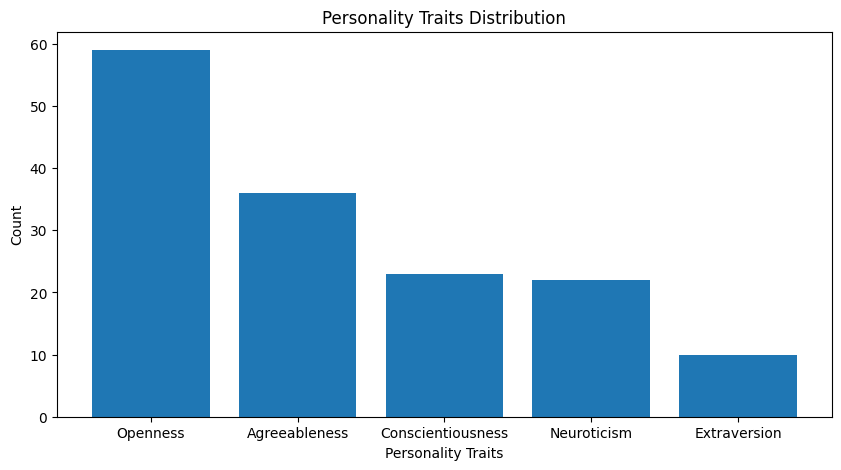

In [12]:
#Personality Traits Distribution
personality=df['Personality Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(personality.index,personality.values)
plt.title('Personality Traits Distribution')
plt.xlabel('Personality Traits')
plt.ylabel('Count')
plt.show()

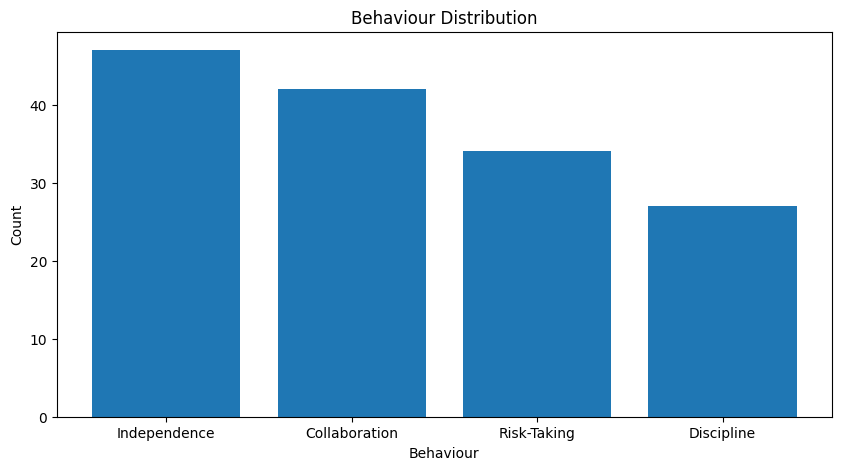

In [13]:
# Behavioural Traits Distribution
behaviour=df['Behavioural Traits'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(behaviour.index,behaviour.values)
plt.title('Behaviour Distribution')
plt.xlabel('Behaviour')
plt.ylabel('Count')
plt.show()

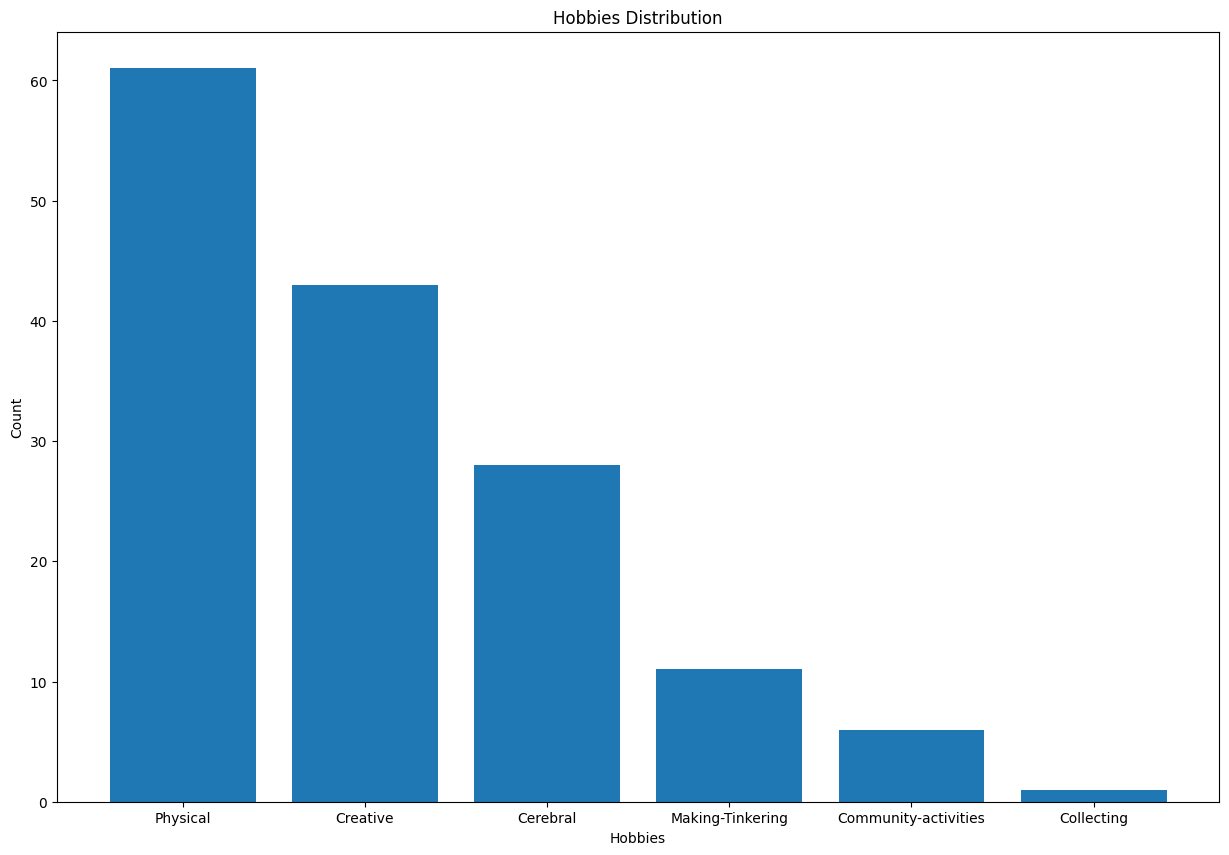

In [14]:
# Hobbies Distribution
hobbies=df['Hobbies'].value_counts()
plt.figure(figsize=(15,10))
plt.bar(hobbies.index,hobbies.values)
plt.title('Hobbies Distribution')
plt.xlabel('Hobbies')
plt.ylabel('Count')
plt.show()

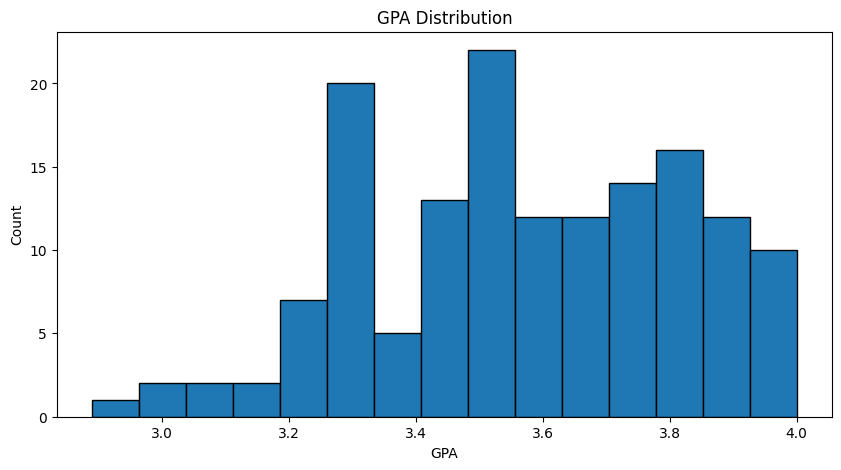

In [15]:
# GPA distribution
gpa=df['GPA'].value_counts()
plt.figure(figsize=(10, 5))
plt.hist(df['GPA'], bins=15, edgecolor='black')  # Adjust bins as needed
plt.title('GPA Distribution')
plt.xlabel('GPA')
plt.ylabel('Count')
plt.show()

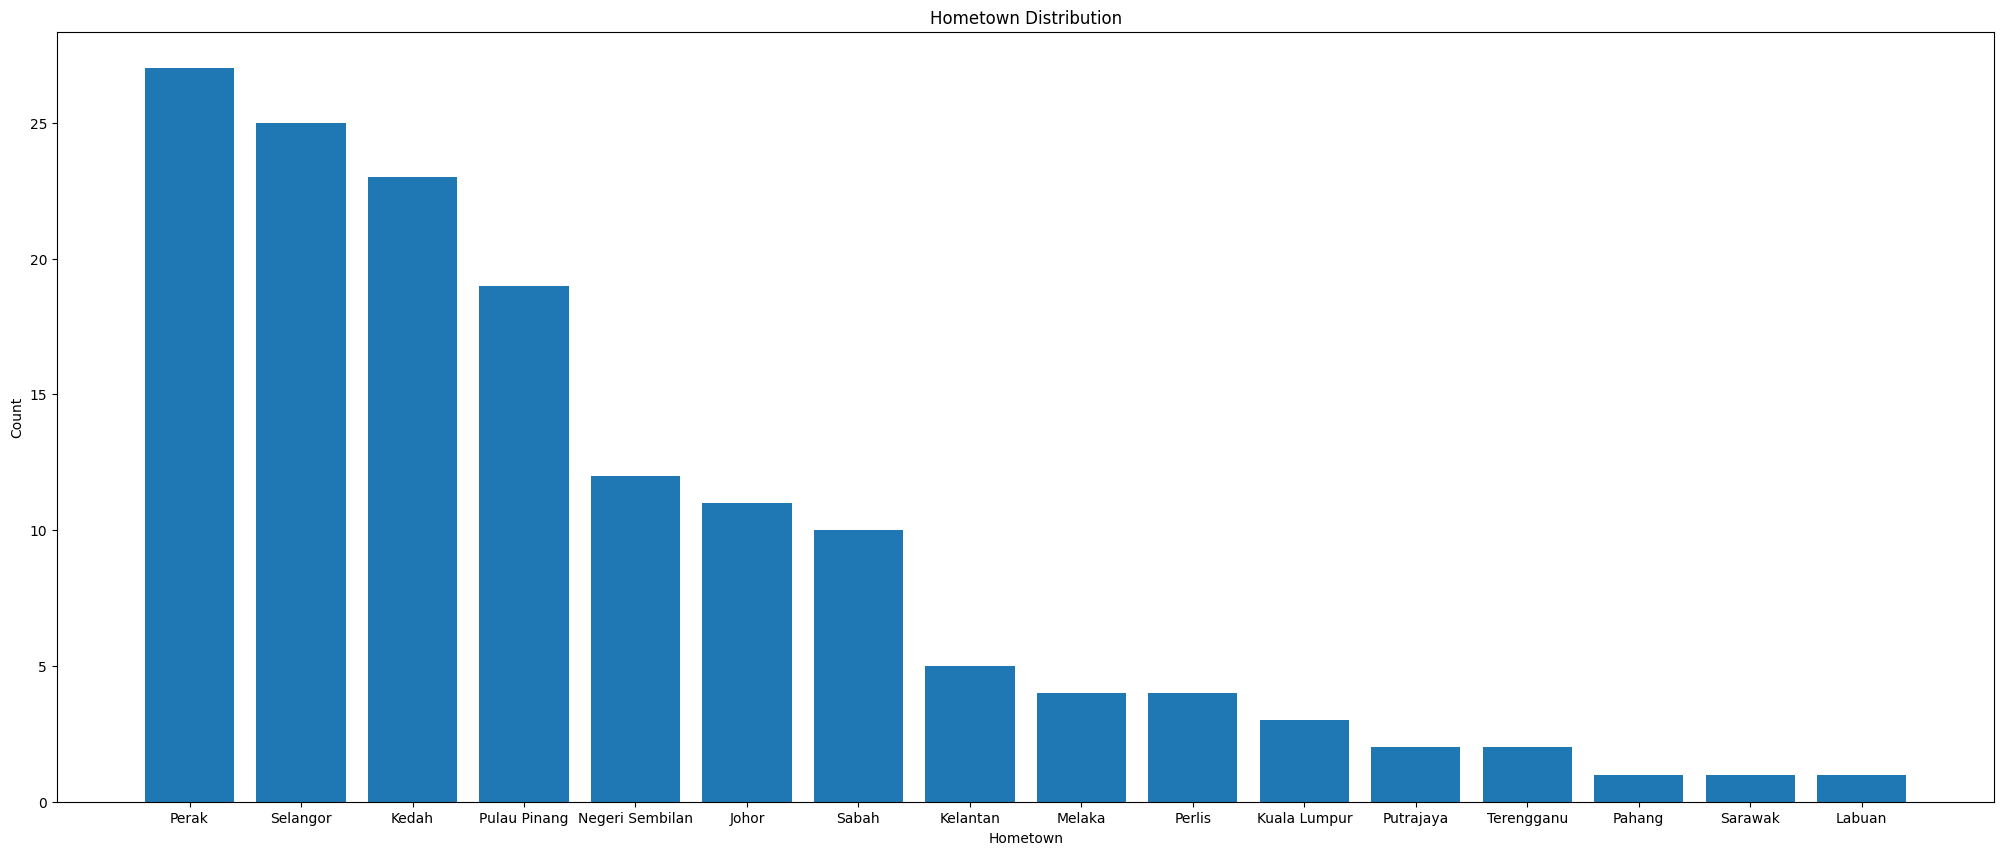

In [16]:
# Hometown
hometown=df['Hometown'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(hometown.index,hometown.values)
plt.title('Hometown Distribution')
plt.xlabel('Hometown')
plt.ylabel('Count')
plt.show()

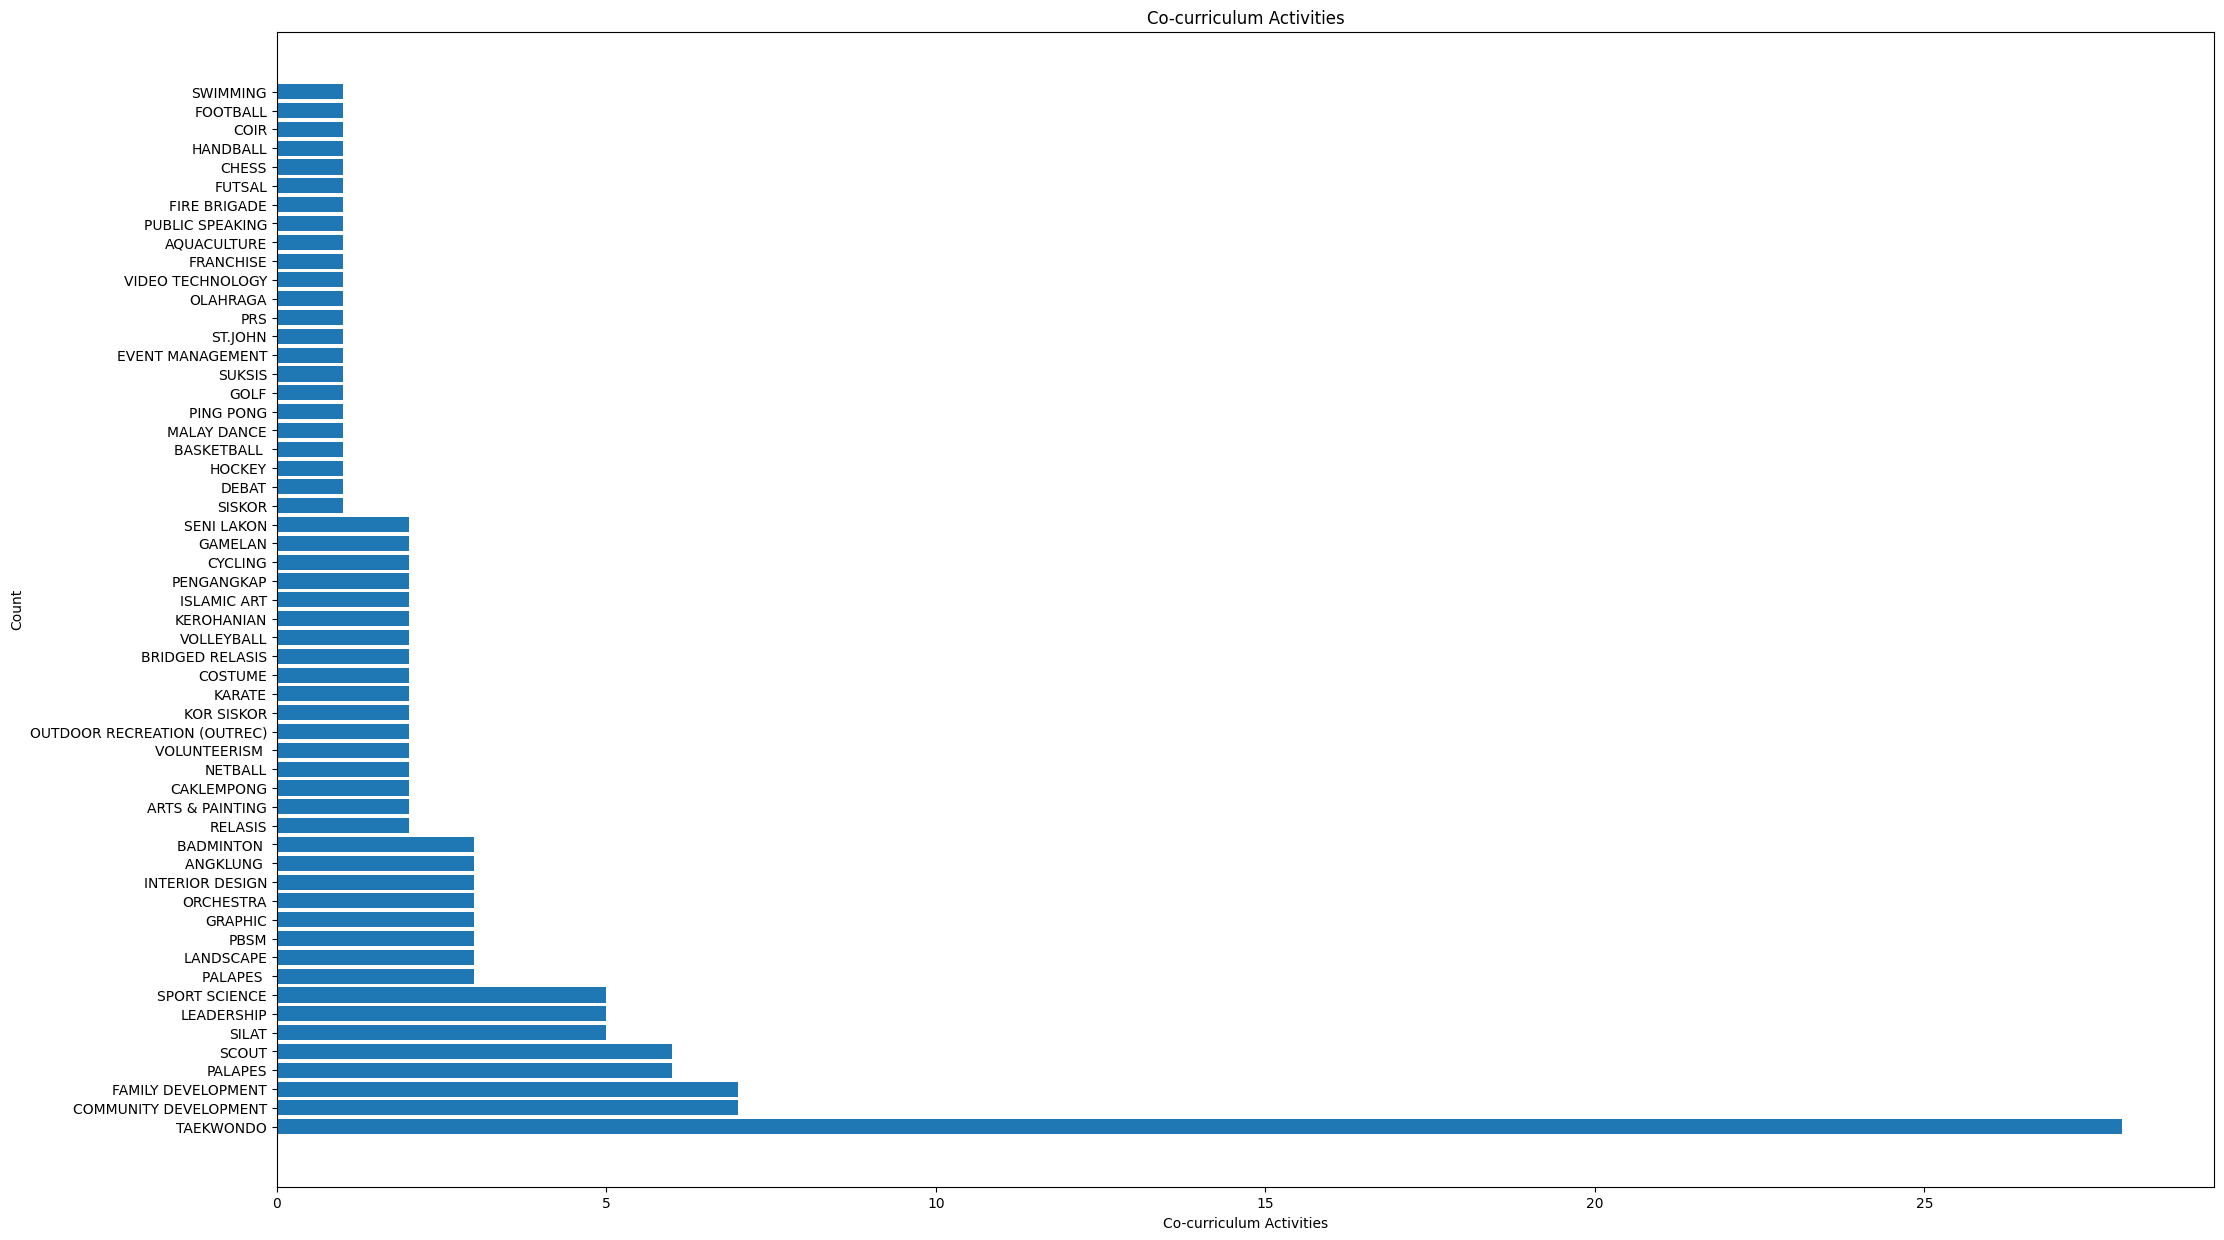

In [17]:
# Co-curriculum distribution
kok=df['Co-curriculum Activities'].value_counts()
plt.figure(figsize=(25,15))
plt.barh(kok.index,kok.values)
plt.title('Co-curriculum Activities')
plt.xlabel('Co-curriculum Activities')
plt.ylabel('Count')
plt.show()

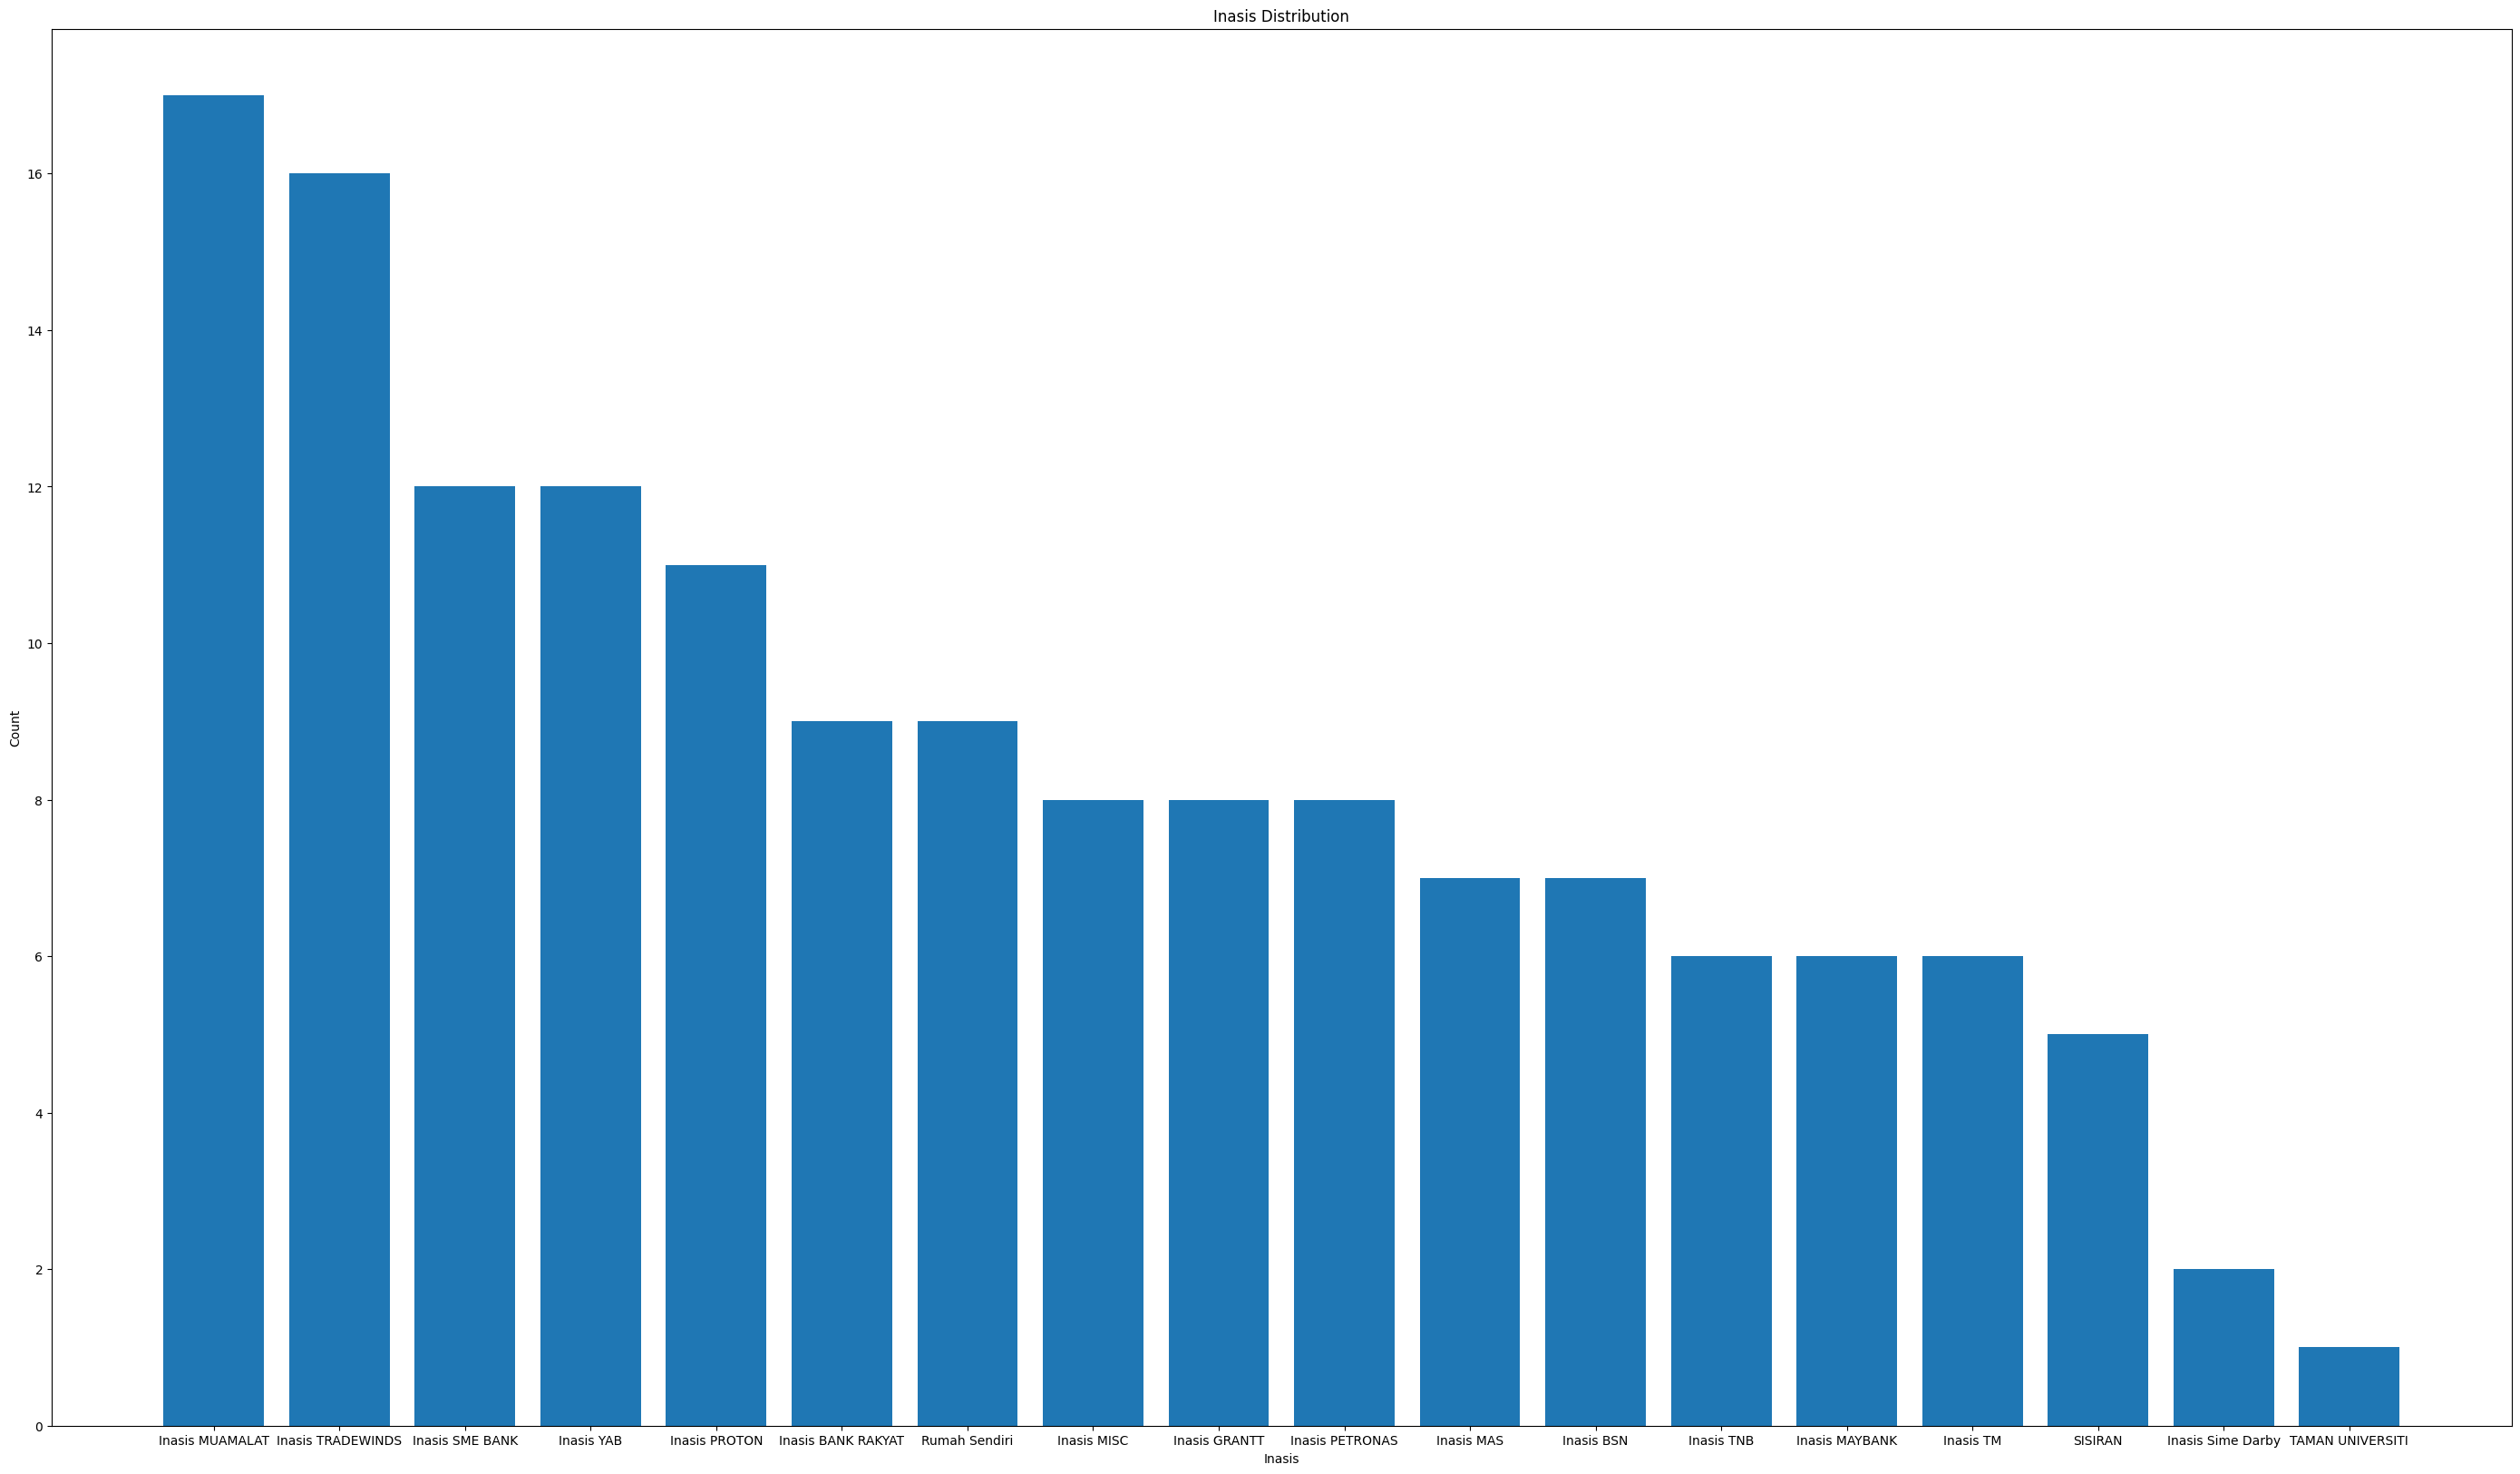

In [18]:
#Inasis Distribution
inasis=df['Inasis'].value_counts()
plt.figure(figsize=(35,20))
plt.bar(inasis.index,inasis.values)
plt.title('Inasis Distribution')
plt.xlabel('Inasis')
plt.ylabel('Count')
plt.show()

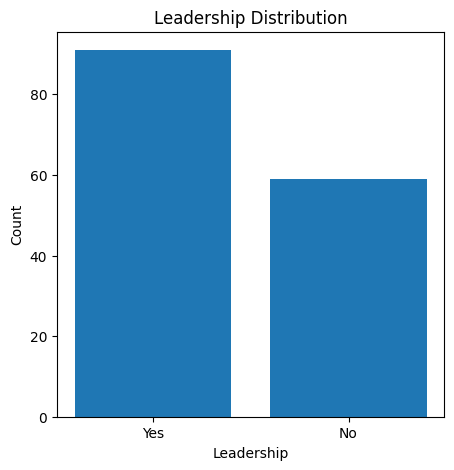

In [19]:
# Leadership Distribution
leadership=df['Leadership Experience'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(leadership.index,leadership.values)
plt.title('Leadership Distribution')
plt.xlabel('Leadership')
plt.ylabel('Count')
plt.show()

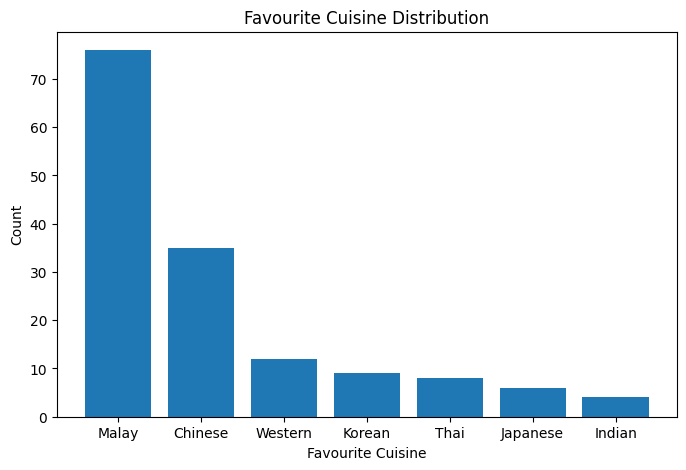

In [20]:
cuisine=df['Favourite Cuisine'].value_counts()
plt.figure(figsize=(8,5))
plt.bar(cuisine.index,cuisine.values)
plt.title('Favourite Cuisine Distribution')
plt.xlabel('Favourite Cuisine')
plt.ylabel('Count')
plt.show()

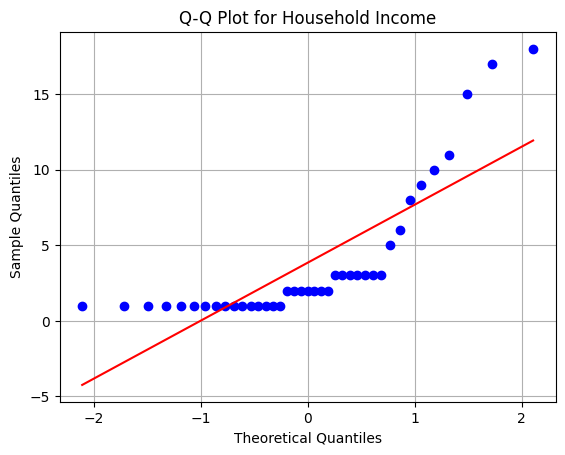

In [21]:
# estimated family income
income=df['Estimated Household Income'].value_counts()
stats.probplot(income, dist="norm", plot=plt)
plt.title('Q-Q Plot for Household Income')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

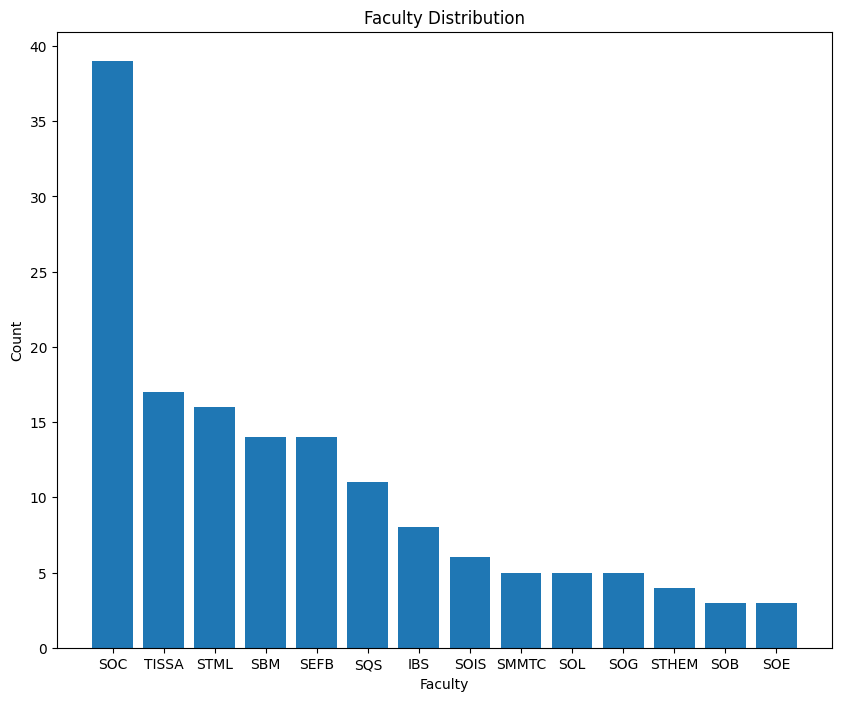

In [22]:
# faculty distribution
faculty=df['Faculty'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(faculty.index,faculty.values)
plt.title('Faculty Distribution')
plt.xlabel('Faculty')
plt.ylabel('Count')
plt.show()

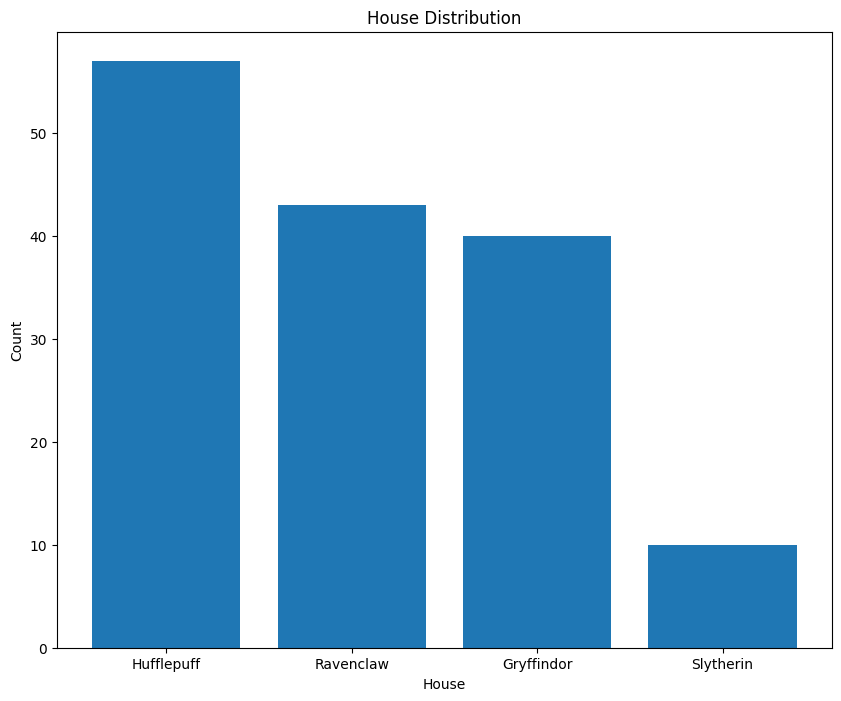

In [23]:
house_count=df['Hogwarts House'].value_counts()
plt.figure(figsize=(10,8))
plt.bar(house_count.index,house_count.values)
plt.title('House Distribution')
plt.xlabel('House')
plt.ylabel('Count')
plt.show()

In [24]:
df.describe().transpose()

count         mean           std     min  \
GPA                         150.0     3.571267      0.246868    2.89   
Estimated Household Income  150.0  8221.344595  19068.298153  750.00   
Number of Best Friends      150.0     5.885906     11.846632    0.00   

                                  25%      50%       75%       max  
GPA                            3.3675     3.56     3.785       4.0  
Estimated Household Income  2500.0000  4000.00  9000.000  200000.0  
Number of Best Friends         3.0000     4.00     6.000     140.0

<Axes: xlabel='GPA', ylabel='Estimated Household Income'>

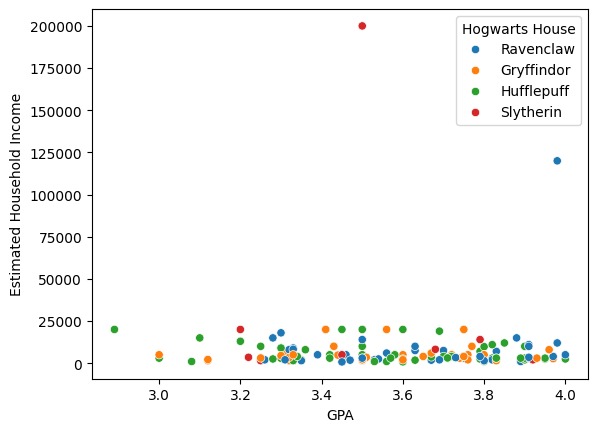

In [25]:
sns.scatterplot(data=df,x='GPA',y='Estimated Household Income',hue='Hogwarts House')

<Axes: xlabel='GPA', ylabel='Number of Best Friends'>

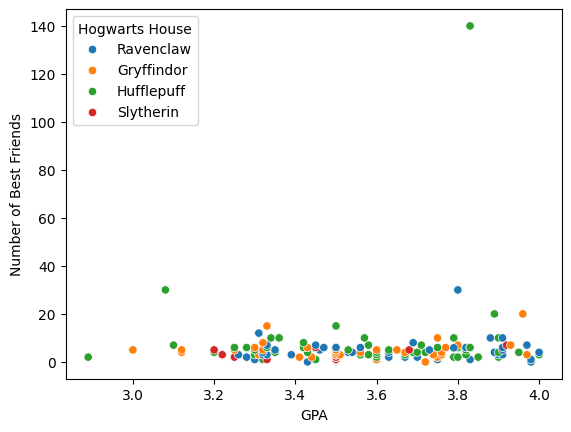

In [26]:
sns.scatterplot(data=df,x='GPA',y='Number of Best Friends',hue='Hogwarts House')

In [27]:
# ordinary encoding
ordinal_encoder = OrdinalEncoder()
df['Leadership Experience'] = ordinal_encoder.fit_transform(df[['Leadership Experience']])
df['Leadership Experience'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Leadership Experience, dtype: float64

In [28]:
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [29]:
# mapping for df['Personality Traits']
df['Personality Traits'].unique()

array(['Conscientiousness', 'Neuroticism', 'Openness', 'Extraversion',
       'Agreeableness'], dtype=object)

In [30]:
map_dict={
    'Openness':1,
    'Conscientiousness':2,
    'Extraversion':3,
    'Agreeableness':4,
    'Neuroticism':5
}
df['Personality Traits']=df['Personality Traits'].map(map_dict)
df.head()

Personality Traits Behavioural Traits           Hobbies   GPA  \
0                   2       Independence          Cerebral  3.43   
1                   5       Independence          Cerebral  3.72   
2                   2         Discipline          Cerebral  3.98   
3                   2         Discipline  Making-Tinkering  3.30   
4                   1        Risk-Taking          Physical  3.30   

          Hometown             Inasis Co-curriculum Activities  \
0         Kelantan  Inasis TRADEWINDS                ORCHESTRA   
1            Perak         Inasis MAS                TAEKWONDO   
2         Kelantan  Inasis TRADEWINDS                ORCHESTRA   
3            Perak  Inasis Sime Darby          BRIDGED RELASIS   
4  Negeri Sembilan  Inasis Sime Darby               BADMINTON    

   Leadership Experience Favourite Cuisine  Estimated Household Income  \
0                    1.0             Malay                     10000.0   
1                    1.0           Western                      5000.0   
2                    1.0             Malay                     12000.0   
3                    0.0             Malay                      9000.0   
4                    0.0           Chinese                     18000.0   

   Number of Best Friends Faculty Hogwarts House  
0                     0.0     SOC      Ravenclaw  
1                     0.0     SQS     Gryffindor  
2                     0.0     SOC      Ravenclaw  
3                     1.0    STML     Hufflepuff  
4                     1.0     SQS      Ravenclaw

In [31]:
# mapping for df['Behavioural Traits']
df['Behavioural Traits'].unique()

array(['Independence', 'Discipline', 'Risk-Taking', 'Collaboration'],
      dtype=object)

In [32]:
map_dict={
    'Independence': 1,
    'Collaboration': 2,
    'Discipline': 3,
    'Risk-Taking': 4
}
df['Behavioural Traits']=df['Behavioural Traits'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits           Hobbies   GPA  \
0                   2                   1          Cerebral  3.43   
1                   5                   1          Cerebral  3.72   
2                   2                   3          Cerebral  3.98   
3                   2                   3  Making-Tinkering  3.30   
4                   1                   4          Physical  3.30   

          Hometown             Inasis Co-curriculum Activities  \
0         Kelantan  Inasis TRADEWINDS                ORCHESTRA   
1            Perak         Inasis MAS                TAEKWONDO   
2         Kelantan  Inasis TRADEWINDS                ORCHESTRA   
3            Perak  Inasis Sime Darby          BRIDGED RELASIS   
4  Negeri Sembilan  Inasis Sime Darby               BADMINTON    

   Leadership Experience Favourite Cuisine  Estimated Household Income  \
0                    1.0             Malay                     10000.0   
1                    1.0           Western                      5000.0   
2                    1.0             Malay                     12000.0   
3                    0.0             Malay                      9000.0   
4                    0.0           Chinese                     18000.0   

   Number of Best Friends Faculty Hogwarts House  
0                     0.0     SOC      Ravenclaw  
1                     0.0     SQS     Gryffindor  
2                     0.0     SOC      Ravenclaw  
3                     1.0    STML     Hufflepuff  
4                     1.0     SQS      Ravenclaw

In [33]:
# mapping for df['Hobbies']
df['Hobbies'].unique()

array(['Cerebral', 'Making-Tinkering', 'Physical', 'Creative',
       'Community-activities', 'Collecting'], dtype=object)

In [34]:
map_dict={
    'Physical':1,
    'Cerebral':2,
    'Community-activities':3,
    'Making-Tinkering': 4,
    'Creative': 5,
    'Collecting': 6
}
df['Hobbies']=df['Hobbies'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA         Hometown  \
0                   2                   1        2  3.43         Kelantan   
1                   5                   1        2  3.72            Perak   
2                   2                   3        2  3.98         Kelantan   
3                   2                   3        4  3.30            Perak   
4                   1                   4        1  3.30  Negeri Sembilan   

              Inasis Co-curriculum Activities  Leadership Experience  \
0  Inasis TRADEWINDS                ORCHESTRA                    1.0   
1         Inasis MAS                TAEKWONDO                    1.0   
2  Inasis TRADEWINDS                ORCHESTRA                    1.0   
3  Inasis Sime Darby          BRIDGED RELASIS                    0.0   
4  Inasis Sime Darby               BADMINTON                     0.0   

  Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
0             Malay                     10000.0                     0.0   
1           Western                      5000.0                     0.0   
2             Malay                     12000.0                     0.0   
3             Malay                      9000.0                     1.0   
4           Chinese                     18000.0                     1.0   

  Faculty Hogwarts House  
0     SOC      Ravenclaw  
1     SQS     Gryffindor  
2     SOC      Ravenclaw  
3    STML     Hufflepuff  
4     SQS      Ravenclaw

In [35]:
# mapping for df['Hometown']
df['Hometown'].unique()

array(['Kelantan', 'Perak', 'Negeri Sembilan', 'Selangor', 'Kedah',
       'Putrajaya', 'Pulau Pinang', 'Kuala Lumpur', 'Melaka', 'Sabah',
       'Johor', 'Pahang', 'Perlis', 'Sarawak', 'Terengganu', 'Labuan'],
      dtype=object)

In [36]:
map_dict = {
    'Sabah': 'Borneo',
    'Sarawak': 'Borneo',
    'Kuala Lumpur': 'Central',
    'Selangor': 'Central',
    'Perak': 'North',
    'Pahang': 'East',
    'Kedah': 'North',
    'Negeri Sembilan': 'Central',
    'Kelantan': 'East',
    'Perlis': 'North',
    'Pulau Pinang': 'North',
    'Melaka': 'South',
    'Terengganu': 'East',
    'Johor': 'South',
    'Labuan': 'Borneo',
    'Putrajaya': 'Central'
}

df['Hometown'] = df['Hometown'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA Hometown  \
0                   2                   1        2  3.43     East   
1                   5                   1        2  3.72    North   
2                   2                   3        2  3.98     East   
3                   2                   3        4  3.30    North   
4                   1                   4        1  3.30  Central   

              Inasis Co-curriculum Activities  Leadership Experience  \
0  Inasis TRADEWINDS                ORCHESTRA                    1.0   
1         Inasis MAS                TAEKWONDO                    1.0   
2  Inasis TRADEWINDS                ORCHESTRA                    1.0   
3  Inasis Sime Darby          BRIDGED RELASIS                    0.0   
4  Inasis Sime Darby               BADMINTON                     0.0   

  Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
0             Malay                     10000.0                     0.0   
1           Western                      5000.0                     0.0   
2             Malay                     12000.0                     0.0   
3             Malay                      9000.0                     1.0   
4           Chinese                     18000.0                     1.0   

  Faculty Hogwarts House  
0     SOC      Ravenclaw  
1     SQS     Gryffindor  
2     SOC      Ravenclaw  
3    STML     Hufflepuff  
4     SQS      Ravenclaw

In [37]:
df['Hometown'].unique()

array(['East', 'North', 'Central', 'South', 'Borneo'], dtype=object)

In [38]:
map_dict={
    'Borneo':1,
    'Central':2,
    'East':3,
    'North':4,
    'South':5
}
df['Hometown']=df['Hometown'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown  \
0                   2                   1        2  3.43         3   
1                   5                   1        2  3.72         4   
2                   2                   3        2  3.98         3   
3                   2                   3        4  3.30         4   
4                   1                   4        1  3.30         2   

              Inasis Co-curriculum Activities  Leadership Experience  \
0  Inasis TRADEWINDS                ORCHESTRA                    1.0   
1         Inasis MAS                TAEKWONDO                    1.0   
2  Inasis TRADEWINDS                ORCHESTRA                    1.0   
3  Inasis Sime Darby          BRIDGED RELASIS                    0.0   
4  Inasis Sime Darby               BADMINTON                     0.0   

  Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
0             Malay                     10000.0                     0.0   
1           Western                      5000.0                     0.0   
2             Malay                     12000.0                     0.0   
3             Malay                      9000.0                     1.0   
4           Chinese                     18000.0                     1.0   

  Faculty Hogwarts House  
0     SOC      Ravenclaw  
1     SQS     Gryffindor  
2     SOC      Ravenclaw  
3    STML     Hufflepuff  
4     SQS      Ravenclaw

In [39]:
df['Inasis'].unique()

array(['Inasis TRADEWINDS', 'Inasis MAS', 'Inasis Sime Darby',
       'Inasis TNB', 'Inasis MAYBANK', 'Inasis MISC', 'Inasis PROTON',
       'Inasis SME BANK', 'Inasis GRANTT', 'Inasis MUAMALAT',
       'Inasis PETRONAS', 'SISIRAN', 'Inasis BANK RAKYAT', 'Inasis YAB',
       'Rumah Sendiri', 'Inasis BSN', 'Inasis TM', 'TAMAN UNIVERSITI'],
      dtype=object)

In [40]:
map_dict = {
    'Inasis TM':'B',
    'Inasis BANK RAKYAT':'D',
    'Inasis MAS': 'A',
    'Rumah Sendiri': 'F',
    'Inasis TRADEWINDS': 'A',
    'SISIRAN': 'E',
    'Inasis PETRONAS': 'B',
    'Inasis MUAMALAT': 'C',
    'Inasis TNB': 'A',
    'Inasis BSN':'B',
    'Inasis GRANTT':'B',
    'Inasis PROTON':'A',
    'Inasis MISC': 'B',
    'Inasis SME BANK':'D',
    'Inasis YAB': 'C',
    'Inasis MAYBANK': 'A',
    'TAMAN UNIVERSITI': 'E',
    'Inasis Sime Darby':'B'
}
df['Inasis']=df['Inasis'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown Inasis  \
0                   2                   1        2  3.43         3      A   
1                   5                   1        2  3.72         4      A   
2                   2                   3        2  3.98         3      A   
3                   2                   3        4  3.30         4      B   
4                   1                   4        1  3.30         2      B   

  Co-curriculum Activities  Leadership Experience Favourite Cuisine  \
0                ORCHESTRA                    1.0             Malay   
1                TAEKWONDO                    1.0           Western   
2                ORCHESTRA                    1.0             Malay   
3          BRIDGED RELASIS                    0.0             Malay   
4               BADMINTON                     0.0           Chinese   

   Estimated Household Income  Number of Best Friends Faculty Hogwarts House  
0                     10000.0                     0.0     SOC      Ravenclaw  
1                      5000.0                     0.0     SQS     Gryffindor  
2                     12000.0                     0.0     SOC      Ravenclaw  
3                      9000.0                     1.0    STML     Hufflepuff  
4                     18000.0                     1.0     SQS      Ravenclaw

In [41]:
df['Estimated Household Income'].unique()
def map_income_to_class(income):
  if income <= 6338:
    return 1
  elif 6339 < income <= 10959:
    return 2
  else:
    return 3

df['Estimated Household Income'] = df['Estimated Household Income'].apply(map_income_to_class)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown Inasis  \
0                   2                   1        2  3.43         3      A   
1                   5                   1        2  3.72         4      A   
2                   2                   3        2  3.98         3      A   
3                   2                   3        4  3.30         4      B   
4                   1                   4        1  3.30         2      B   

  Co-curriculum Activities  Leadership Experience Favourite Cuisine  \
0                ORCHESTRA                    1.0             Malay   
1                TAEKWONDO                    1.0           Western   
2                ORCHESTRA                    1.0             Malay   
3          BRIDGED RELASIS                    0.0             Malay   
4               BADMINTON                     0.0           Chinese   

   Estimated Household Income  Number of Best Friends Faculty Hogwarts House  
0                           2                     0.0     SOC      Ravenclaw  
1                           1                     0.0     SQS     Gryffindor  
2                           3                     0.0     SOC      Ravenclaw  
3                           2                     1.0    STML     Hufflepuff  
4                           3                     1.0     SQS      Ravenclaw

In [42]:
df['Inasis'].unique()

array(['A', 'B', 'D', 'C', 'E', 'F'], dtype=object)

In [43]:
map_dict={
    'A':1,
    'B':2,
    'C':3,
    'D':4,
    'E':5,
    'F':6
}
df['Inasis']=df['Inasis'].map(map_dict)

In [44]:
df['Co-curriculum Activities'].unique()

array(['ORCHESTRA', 'TAEKWONDO', 'BRIDGED RELASIS', 'BADMINTON ',
       'SENI LAKON', 'FOOTBALL', 'COIR', 'GAMELAN', 'ANGKLUNG ',
       'CYCLING', 'PENGANGKAP', 'ISLAMIC ART', 'PALAPES ', 'GRAPHIC',
       'LEADERSHIP', 'SILAT', 'FAMILY DEVELOPMENT', 'KEROHANIAN', 'PBSM',
       'VOLLEYBALL', 'HANDBALL', 'CHESS', 'PALAPES', 'FUTSAL',
       'LANDSCAPE', 'FIRE BRIGADE', 'PUBLIC SPEAKING',
       'OUTDOOR RECREATION (OUTREC)', 'ST.JOHN', 'CAKLEMPONG',
       'KOR SISKOR', 'INTERIOR DESIGN', 'AQUACULTURE', 'FRANCHISE',
       'ARTS & PAINTING', 'SCOUT', 'VIDEO TECHNOLOGY', 'VOLUNTEERISM ',
       'OLAHRAGA', 'COMMUNITY DEVELOPMENT', 'PRS', 'KARATE', 'COSTUME',
       'DEBAT', 'HOCKEY', 'NETBALL', 'BASKETBALL ', 'RELASIS', 'SUKSIS',
       'PING PONG', 'SPORT SCIENCE', 'EVENT MANAGEMENT', 'GOLF',
       'MALAY DANCE', 'SISKOR', 'SWIMMING'], dtype=object)

In [45]:
# label encoder for kok
label_encoder = LabelEncoder()
df['Co-curriculum Activities'] = label_encoder.fit_transform(df['Co-curriculum Activities'])
df['Co-curriculum Activities'].head()

0    34
1    52
2    34
3     5
4     3
Name: Co-curriculum Activities, dtype: int64

In [46]:
df['Favourite Cuisine'].unique()

array(['Malay', 'Western', 'Chinese', 'Korean', 'Thai', 'Indian',
       'Japanese'], dtype=object)

In [47]:
# label encoder for favourite cuisine
label_encoder = LabelEncoder()
df['Favourite Cuisine'] = label_encoder.fit_transform(df['Favourite Cuisine'])
df['Favourite Cuisine'].head()

0    4
1    6
2    4
3    4
4    0
Name: Favourite Cuisine, dtype: int64

In [48]:
# label encoder for faculty
label_encoder=LabelEncoder()
df['Faculty']=label_encoder.fit_transform(df['Faculty'])
df['Faculty'].head()

0     5
1    10
2     5
3    12
4    10
Name: Faculty, dtype: int64

In [49]:
df['Hogwarts House'].unique()

array(['Ravenclaw', 'Gryffindor', 'Hufflepuff', 'Slytherin'], dtype=object)

In [50]:
map_dict = {
    'Ravenclaw': 1,
    'Slytherin': 2,
    'Gryffindor': 3,
    'Hufflepuff': 4
}
df['Hogwarts House'] = df['Hogwarts House'].map(map_dict)
df.head()

Personality Traits  Behavioural Traits  Hobbies   GPA  Hometown  Inasis  \
0                   2                   1        2  3.43         3       1   
1                   5                   1        2  3.72         4       1   
2                   2                   3        2  3.98         3       1   
3                   2                   3        4  3.30         4       2   
4                   1                   4        1  3.30         2       2   

   Co-curriculum Activities  Leadership Experience  Favourite Cuisine  \
0                        34                    1.0                  4   
1                        52                    1.0                  6   
2                        34                    1.0                  4   
3                         5                    0.0                  4   
4                         3                    0.0                  0   

   Estimated Household Income  Number of Best Friends  Faculty  Hogwarts House  
0                           2                     0.0        5               1  
1                           1                     0.0       10               3  
2                           3                     0.0        5               1  
3                           2                     1.0       12               4  
4                           3                     1.0       10               1

In [51]:
# standardization
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols=['GPA','Estimated Household Income','Number of Best Friends']
df[num_cols]=scaler.fit_transform(df[num_cols])
df.head()

Personality Traits  Behavioural Traits  Hobbies       GPA  Hometown  \
0                   2                   1        2  0.486486         3   
1                   5                   1        2  0.747748         4   
2                   2                   3        2  0.981982         3   
3                   2                   3        4  0.369369         4   
4                   1                   4        1  0.369369         2   

   Inasis  Co-curriculum Activities  Leadership Experience  Favourite Cuisine  \
0       1                        34                    1.0                  4   
1       1                        52                    1.0                  6   
2       1                        34                    1.0                  4   
3       2                         5                    0.0                  4   
4       2                         3                    0.0                  0   

   Estimated Household Income  Number of Best Friends  Faculty  Hogwarts House  
0                         0.5                0.000000        5               1  
1                         0.0                0.000000       10               3  
2                         1.0                0.000000        5               1  
3                         0.5                0.007143       12               4  
4                         1.0                0.007143       10               1

In [52]:
# robust scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_cols=['Personality Traits','Behavioural Traits','Hobbies','Hometown','Inasis','Co-curriculum Activities','Favourite Cuisine','Faculty']
df[num_cols]=scaler.fit_transform(df[num_cols])
df.head()

Personality Traits  Behavioural Traits  Hobbies       GPA  Hometown  \
0                0.25            0.000000      0.2  0.486486      0.50   
1                1.00            0.000000      0.2  0.747748      0.75   
2                0.25            0.666667      0.2  0.981982      0.50   
3                0.25            0.666667      0.6  0.369369      0.75   
4                0.00            1.000000      0.0  0.369369      0.25   

   Inasis  Co-curriculum Activities  Leadership Experience  Favourite Cuisine  \
0     0.0                  0.618182                    1.0           0.666667   
1     0.0                  0.945455                    1.0           1.000000   
2     0.0                  0.618182                    1.0           0.666667   
3     0.2                  0.090909                    0.0           0.666667   
4     0.2                  0.054545                    0.0           0.000000   

   Estimated Household Income  Number of Best Friends   Faculty  \
0                         0.5                0.000000  0.384615   
1                         0.0                0.000000  0.769231   
2                         1.0                0.000000  0.384615   
3                         0.5                0.007143  0.923077   
4                         1.0                0.007143  0.769231   

   Hogwarts House  
0               1  
1               3  
2               1  
3               4  
4               1

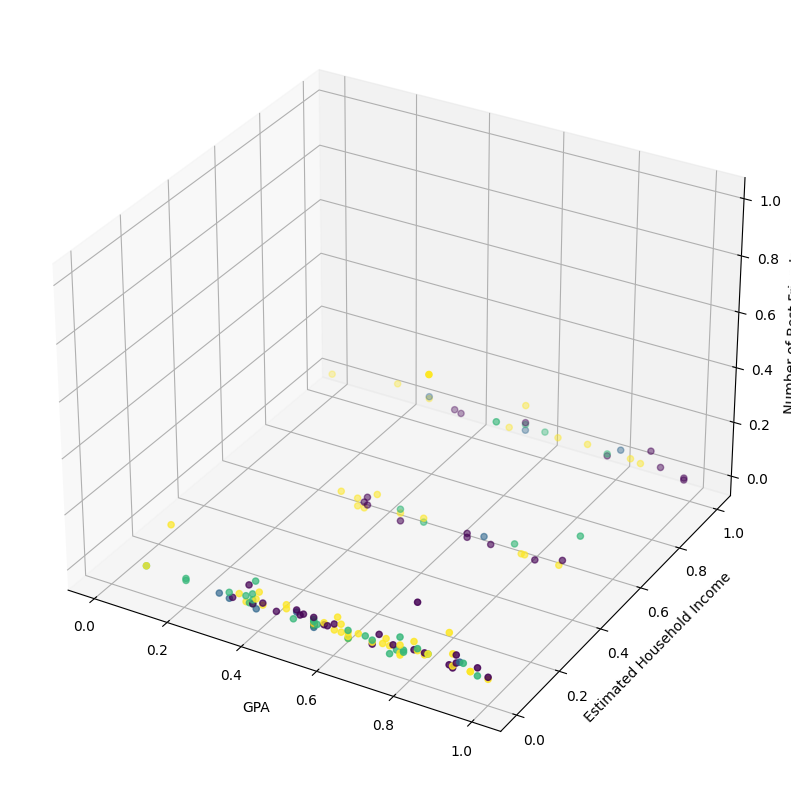

In [53]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['GPA'],df['Estimated Household Income'],df['Number of Best Friends'],c=df['Hogwarts House'],cmap='viridis')
ax.set_xlabel('GPA')
ax.set_ylabel('Estimated Household Income')
ax.set_zlabel('Number of Best Friends')
plt.show()

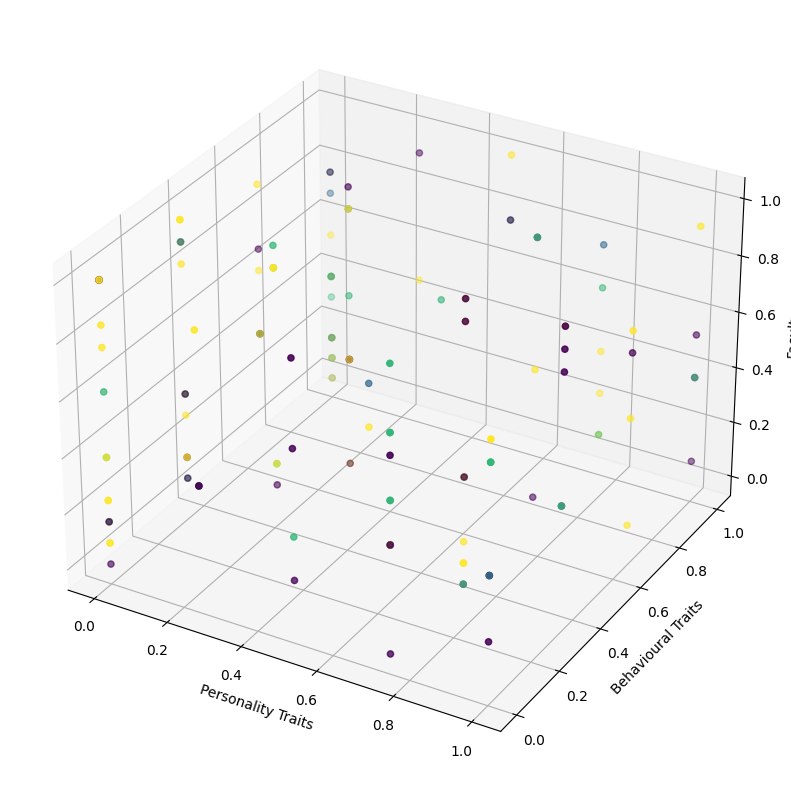

In [54]:
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Personality Traits'],df['Behavioural Traits'],df['Faculty'],c=df['Hogwarts House'],cmap='viridis')
ax.set_xlabel('Personality Traits')
ax.set_ylabel('Behavioural Traits')
ax.set_zlabel('Faculty')
plt.show()

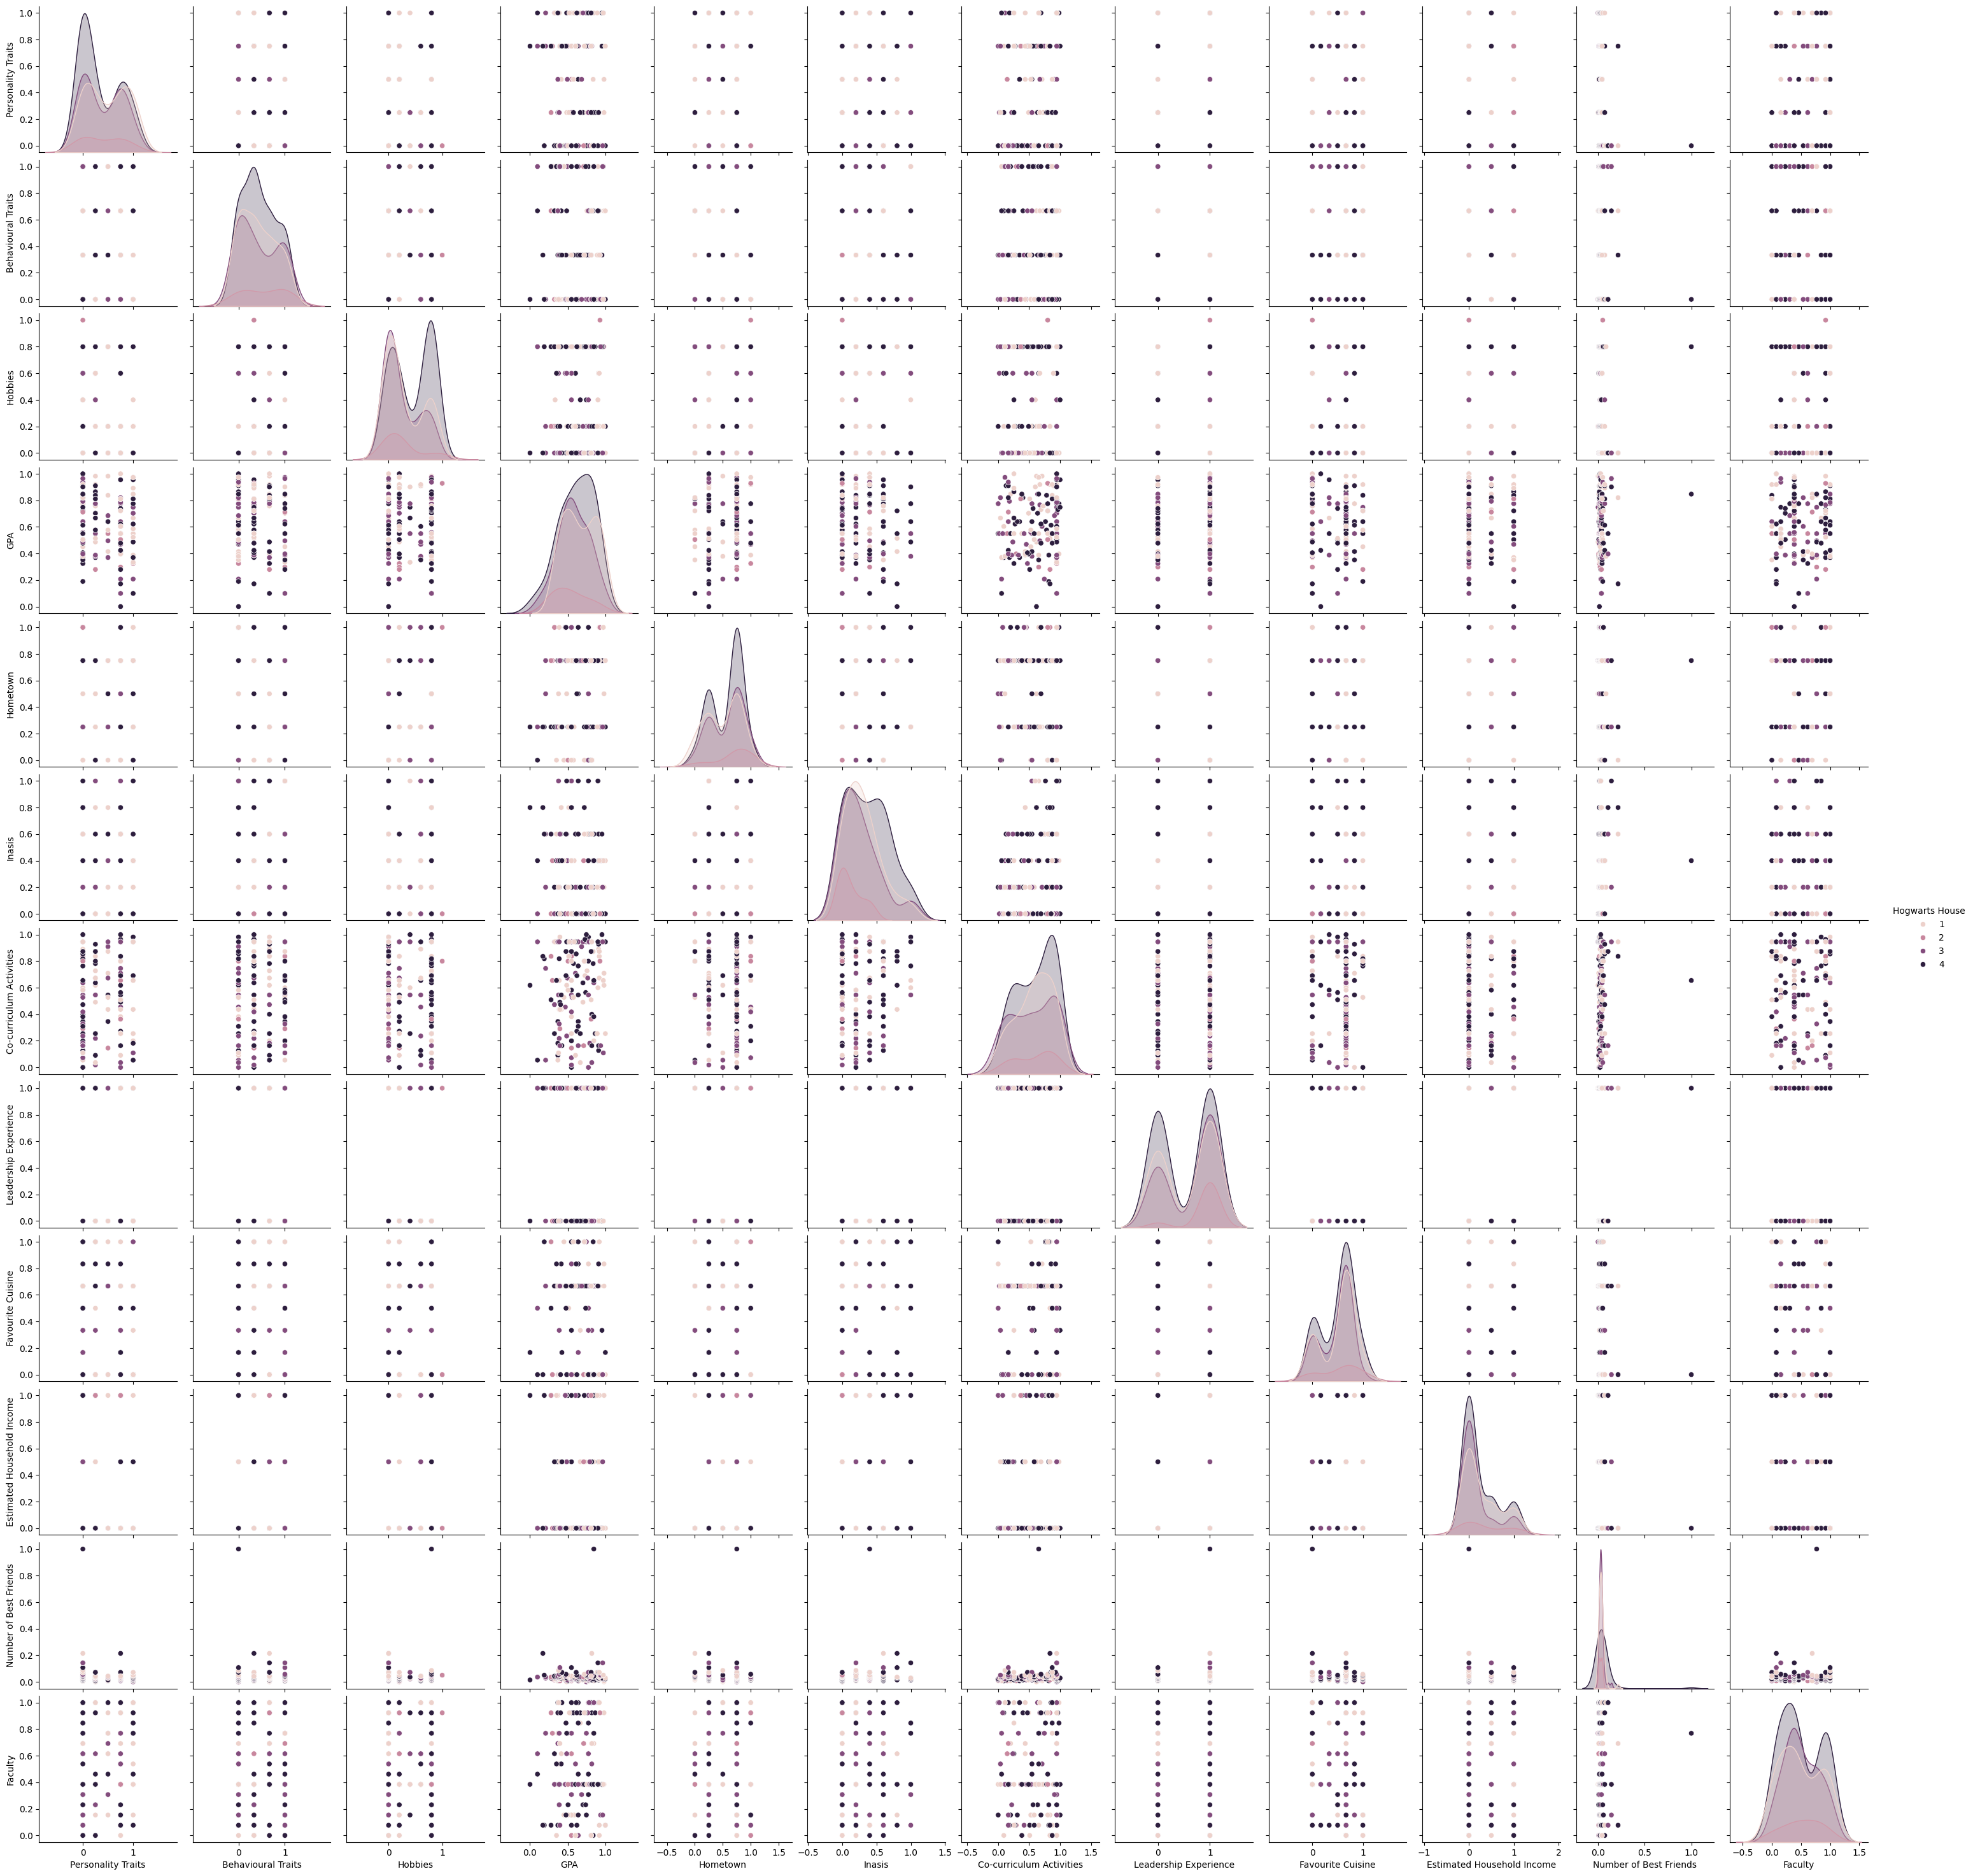

In [55]:
sns.pairplot(df,hue='Hogwarts House')
plt.show()

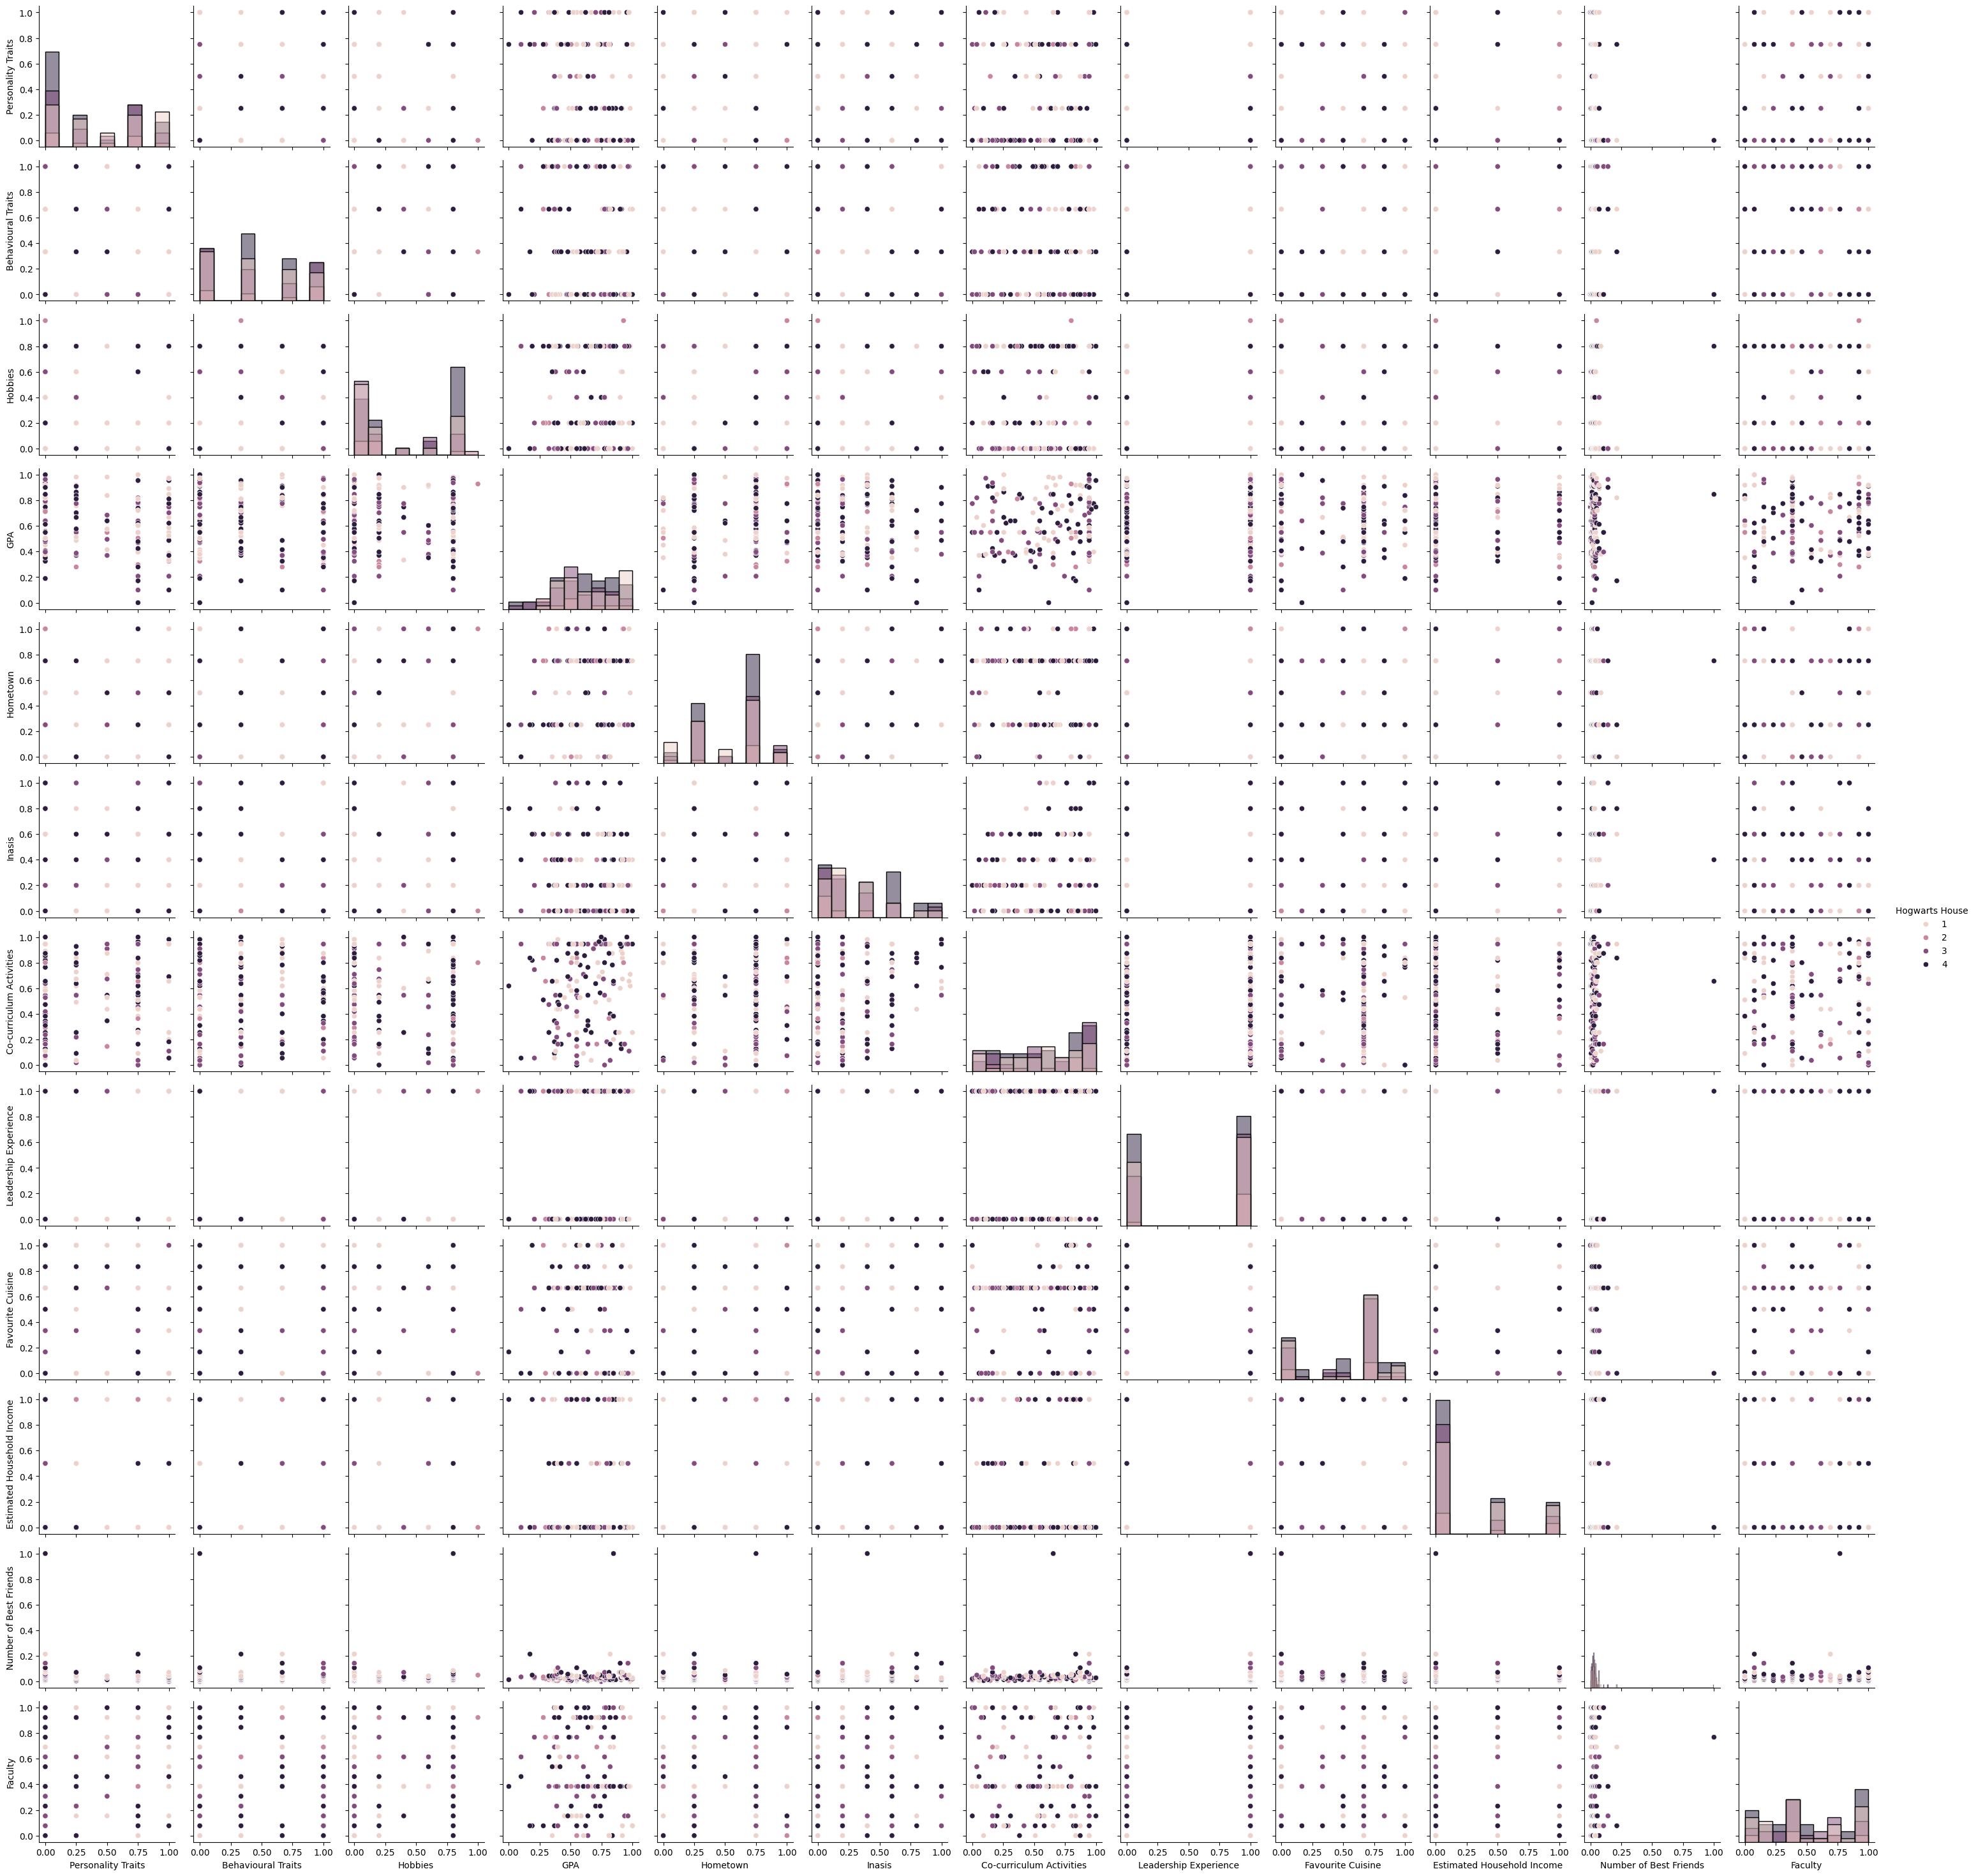

In [56]:
g = sns.PairGrid(df, hue='Hogwarts House')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

<Axes: >

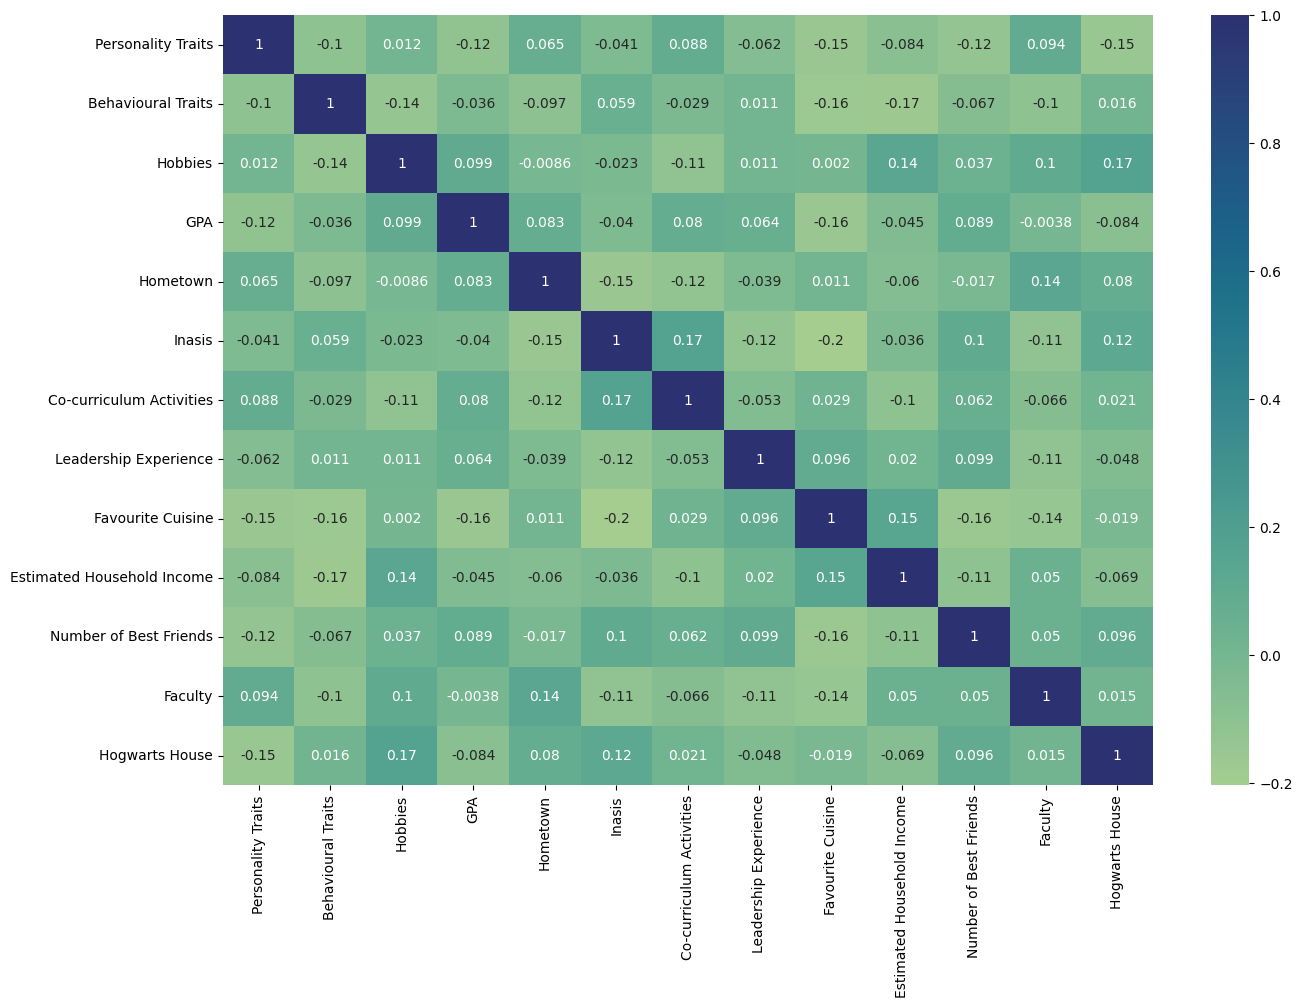

In [57]:
corr=df.corr()
corr
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='crest')

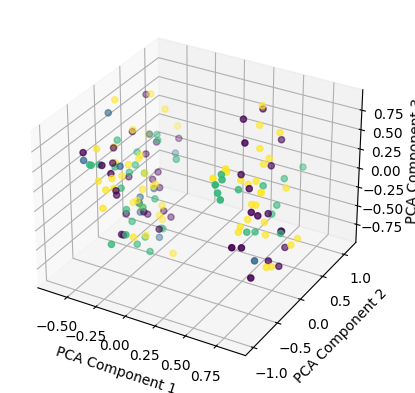

In [100]:
from sklearn.decomposition import PCA
df_X=df.drop('Hogwarts House',axis=1)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=df['Hogwarts House'])
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

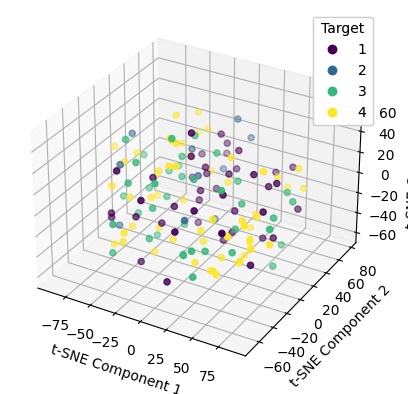

In [101]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3)
tsne_result = tsne.fit_transform(df_X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2], c=df['Hogwarts House'])
legend1 = ax.legend(*scatter.legend_elements(), title="Target")
ax.add_artist(legend1)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()

In [60]:
X = df.drop("Hogwarts House", axis=1)
y = pd.DataFrame(df["Hogwarts House"])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
X_train.shape, X_test.shape

((105, 12), (45, 12))

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Personality Traits          150 non-null    float64
 1   Behavioural Traits          150 non-null    float64
 2   Hobbies                     150 non-null    float64
 3   GPA                         150 non-null    float64
 4   Hometown                    150 non-null    float64
 5   Inasis                      150 non-null    float64
 6   Co-curriculum Activities    150 non-null    float64
 7   Leadership Experience       150 non-null    float64
 8   Favourite Cuisine           150 non-null    float64
 9   Estimated Household Income  150 non-null    float64
 10  Number of Best Friends      150 non-null    float64
 11  Faculty                     150 non-null    float64
 12  Hogwarts House              150 non-null    int64  
dtypes: float64(12), int64(1)
memory usa

In [64]:
from sklearn.tree import DecisionTreeClassifier
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [65]:
y_pred_gini=clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3333


In [66]:
# univariate selection
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures=SelectKBest(score_func=chi2,k='all').fit(X,y)
dfscores=pd.DataFrame(bestfeatures.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(7,'Score'))

                         Specs     Score
2                      Hobbies  3.381600
5                       Inasis  2.174273
7        Leadership Experience  1.958021
9   Estimated Household Income  1.603990
0           Personality Traits  1.293700
4                     Hometown  0.666494
10      Number of Best Friends  0.402129


In [67]:
X_train_selected=bestfeatures.transform(X_train)
X_test_selected=bestfeatures.transform(X_test)
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=100,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train_selected,y_train)
y_pred_gini=clf_gini.predict(X_test_selected)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3333


In [68]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures=SelectKBest(score_func=chi2,k=3).fit(X,y)
dfscores=pd.DataFrame(bestfeatures.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Specs','Score']
print(featureScores.nlargest(3,'Score'))

                   Specs     Score
2                Hobbies  3.381600
5                 Inasis  2.174273
7  Leadership Experience  1.958021


In [69]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X_train, y_train)
selected_features = X_train.columns[mi_scores.argsort()[::-1][:3]]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 3
Selected features : ['Faculty', 'Behavioural Traits', 'Co-curriculum Activities']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5,step=1)
rfe.fit(X,y)
selected_features = X_train.columns[rfe.support_]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 5
Selected features : ['GPA', 'Co-curriculum Activities', 'Favourite Cuisine', 'Number of Best Friends', 'Faculty']


In [71]:
X_train_selected=bestfeatures.transform(X_train)
X_test_selected=bestfeatures.transform(X_test)
clf_gini=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3,min_samples_leaf=5)
clf_gini.fit(X_train_selected,y_train)
y_pred_gini=clf_gini.predict(X_test_selected)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.3333


In [72]:
X_train.head()

Personality Traits  Behavioural Traits  Hobbies       GPA  Hometown  \
81                 0.75            0.666667      0.0  1.000000      0.75   
133                0.00            0.333333      0.8  0.405405      0.75   
137                0.25            0.666667      0.0  0.810811      0.00   
75                 0.00            0.333333      0.4  0.747748      0.25   
109                1.00            0.333333      0.8  0.522523      0.75   

     Inasis  Co-curriculum Activities  Leadership Experience  \
81      0.4                  0.254545                    1.0   
133     0.6                  0.472727                    1.0   
137     0.6                  0.872727                    1.0   
75      0.2                  1.000000                    1.0   
109     0.2                  0.945455                    0.0   

     Favourite Cuisine  Estimated Household Income  Number of Best Friends  \
81            0.000000                         0.0                0.028571   
133           0.000000                         0.0                0.071429   
137           0.666667                         0.0                0.071429   
75            0.666667                         0.0                0.028571   
109           0.666667                         0.0                0.042857   

      Faculty  
81   0.076923  
133  0.923077  
137  0.000000  
75   0.153846  
109  0.923077

In [73]:
y_train.head()

Hogwarts House
81                1
133               4
137               4
75                4
109               1

In [74]:
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=4,weights='uniform')
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with criterion gini index: 0.3111


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [75]:
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=4,weights='distance')
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with criterion gini index: 0.3111


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [76]:
correlation=X_train.corr()
correlation

Personality Traits  Behavioural Traits   Hobbies  \
Personality Traits                    1.000000           -0.030048  0.046264   
Behavioural Traits                   -0.030048            1.000000 -0.178842   
Hobbies                               0.046264           -0.178842  1.000000   
GPA                                  -0.003779           -0.031150  0.051539   
Hometown                              0.031384           -0.047095 -0.084070   
Inasis                               -0.111968            0.115203  0.029563   
Co-curriculum Activities             -0.019735           -0.028641 -0.027162   
Leadership Experience                -0.071032           -0.100595  0.004439   
Favourite Cuisine                    -0.149982           -0.216553  0.017520   
Estimated Household Income           -0.072509           -0.185625  0.134039   
Number of Best Friends               -0.116658           -0.086845  0.087254   
Faculty                               0.144478           -0.099526  0.081098   

                                 GPA  Hometown    Inasis  \
Personality Traits         -0.003779  0.031384 -0.111968   
Behavioural Traits         -0.031150 -0.047095  0.115203   
Hobbies                     0.051539 -0.084070  0.029563   
GPA                         1.000000  0.030711 -0.034192   
Hometown                    0.030711  1.000000 -0.082891   
Inasis                     -0.034192 -0.082891  1.000000   
Co-curriculum Activities    0.107251 -0.155008  0.098567   
Leadership Experience       0.092628 -0.048628 -0.087196   
Favourite Cuisine          -0.193662 -0.051959 -0.164368   
Estimated Household Income -0.041660 -0.078595 -0.080473   
Number of Best Friends      0.133744  0.015201  0.091873   
Faculty                    -0.094426  0.103619 -0.088588   

                            Co-curriculum Activities  Leadership Experience  \
Personality Traits                         -0.019735              -0.071032   
Behavioural Traits                         -0.028641              -0.100595   
Hobbies                                    -0.027162               0.004439   
GPA                                         0.107251               0.092628   
Hometown                                   -0.155008              -0.048628   
Inasis                                      0.098567              -0.087196   
Co-curriculum Activities                    1.000000              -0.080581   
Leadership Experience                      -0.080581               1.000000   
Favourite Cuisine                           0.069189               0.123297   
Estimated Household Income                 -0.068717               0.172984   
Number of Best Friends                      0.056375               0.102130   
Faculty                                    -0.049978              -0.109897   

                            Favourite Cuisine  Estimated Household Income  \
Personality Traits                  -0.149982                   -0.072509   
Behavioural Traits                  -0.216553                   -0.185625   
Hobbies                              0.017520                    0.134039   
GPA                                 -0.193662                   -0.041660   
Hometown                            -0.051959                   -0.078595   
Inasis                              -0.164368                   -0.080473   
Co-curriculum Activities             0.069189                   -0.068717   
Leadership Experience                0.123297                    0.172984   
Favourite Cuisine                    1.000000                    0.179895   
Estimated Household Income           0.179895                    1.000000   
Number of Best Friends              -0.166626                   -0.107556   
Faculty                             -0.204764                    0.014278   

                            Number of Best Friends   Faculty  
Personality Traits                       -0.116658  0.144478  
Behavioural Traits                       -0.086845

<Axes: >

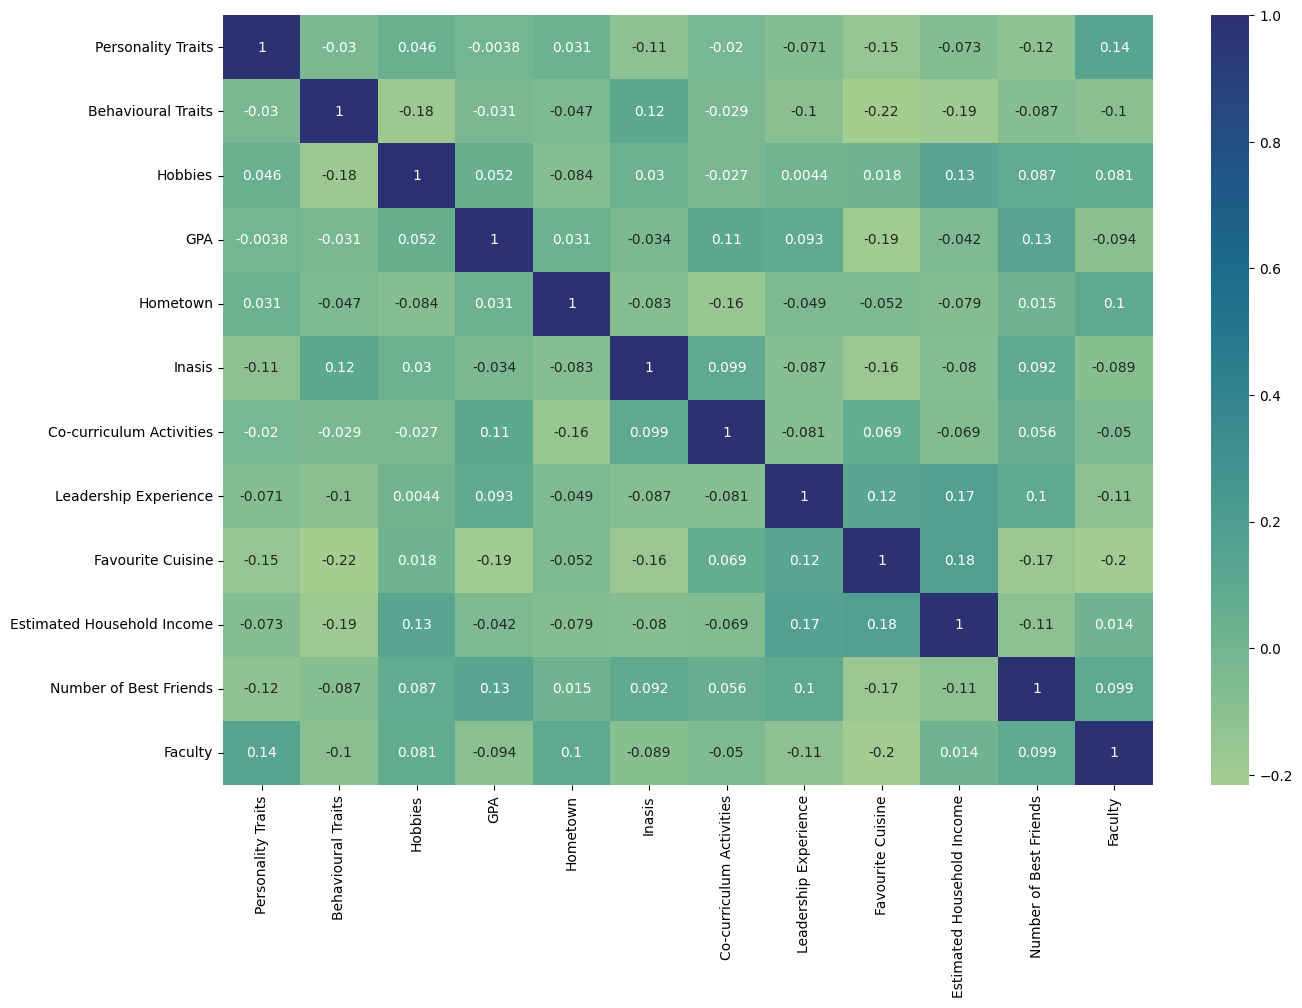

In [77]:
#### Visualizing correlation

plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True,cmap='crest')

In [78]:
# decision tree
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


Model accuracy score with criterion gini index: 0.3111


In [79]:
# knn
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn import neighbors
KNN_model=neighbors.KNeighborsClassifier(n_neighbors=4,weights='uniform')
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, pred)))

Model accuracy score with criterion gini index: 0.1556


In [80]:
# logistic regression
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3778


In [81]:
# naive bayes
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.2889


In [82]:
# svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.2222


In [83]:
# rbf svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='rbf',gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3556


In [84]:
# polynomial svm
# rbf svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='poly',gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3556


In [85]:
# sigmoid svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid',gamma=0.1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3556


In [86]:
# sigmoid svm
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.svm import SVC
svm = SVC(kernel='sigmoid',gamma='auto')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.3556


In [87]:
# random forest
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,criterion='gini',random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.1778


In [88]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(7, 12), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.2889


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [89]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', alpha=1e-6,hidden_layer_sizes=(15,25,10), random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.3778


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [90]:
# neural network
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'solver': ['lbfgs', 'adam', 'sgd'],
    'alpha': [1e-5, 1e-4, 1e-3],
    'hidden_layer_sizes': [(7, 12), (10, 10), (50,), (10, 20, 10)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant', 'adaptive']
}

# Create a base model
mlp = MLPClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best found parameters
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters found:  {'activation': 'relu', 'alpha': 1e-05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Model accuracy score: 0.3333


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Create a base model
svm = SVC(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by grid search
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best found parameters
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)
print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters found:  {'C': 100, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Model accuracy score: 0.2222


In [92]:
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=200)
from sklearn.model_selection import GridSearchCV
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_test, y_pred))

Model accuracy score: 0.3778
Results on the test set:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.17      0.07      0.10        14
           4       0.41      1.00      0.58        16

    accuracy                           0.38        45
   macro avg       0.14      0.27      0.17        45
weighted avg       0.20      0.38      0.24        45



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [93]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',solver='adam', alpha=1e-4,hidden_layer_sizes=(20,50,15),epsilon=1e-8,learning_rate='invscaling',momentum=0.5,random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Model accuracy score: 0.2222
              precision    recall  f1-score   support

           1       0.07      0.09      0.08        11
           2       0.00      0.00      0.00         4
           3       0.15      0.14      0.15        14
           4       0.39      0.44      0.41        16

    accuracy                           0.22        45
   macro avg       0.15      0.17      0.16        45
weighted avg       0.20      0.22      0.21        45



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [94]:
# bernoulliRBM
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=10, random_state=42)
rbm.fit(X)
X_rbm=rbm.transform(X)

In [95]:
from sklearn.neural_network import MLPClassifier
X_train_rbm, X_test_rbm, y_train, y_test = train_test_split(X_rbm, y, test_size=0.3, random_state=42)
mlp = MLPClassifier(
    activation='relu',
    solver='adam',
    alpha=1e-4,
    hidden_layer_sizes=(20, 70, 20),
    epsilon=1e-5,
    learning_rate='adaptive',
    momentum=0.9,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42
)

mlp.fit(X_train_rbm, y_train)
y_pred = mlp.predict(X_test_rbm)
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'.format(accuracy))
print(classification_report(y_test, y_pred))


Model accuracy score: 0.3556
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        14
           4       0.36      1.00      0.52        16

    accuracy                           0.36        45
   macro avg       0.09      0.25      0.13        45
weighted avg       0.13      0.36      0.19        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies', 'Inasis']]
y = df['Hogwarts House']
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
mlp = MLPClassifier(
    activation='relu',
    solver='adam',
    alpha=1e-4,
    hidden_layer_sizes=(20, 50, 15),
    epsilon=1e-8,
    learning_rate='invscaling',
    momentum=0.4,
    random_state=42
)

accuracy_scores = []
for train_index, test_index in rskf.split(X_normalized, y):
    X_train, X_test = X_normalized[train_index], X_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)

print('Mean accuracy score: {0:0.4f}'.format(mean_accuracy))
print('Standard deviation of accuracy scores: {0:0.4f}'.format(std_accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Mean accuracy score: 0.3644
Standard deviation of accuracy scores: 0.0638


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [97]:
# neural network
X = df[['Estimated Household Income', 'Number of Best Friends', 'Leadership Experience', 'Hobbies','Inasis']]
y = df['Hogwarts House']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='sgd', alpha=1e-7,hidden_layer_sizes=(120,80,40),activation='relu',learning_rate='adaptive',random_state=42,max_iter=3500)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.3333


In [102]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.25      0.09      0.13        11
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        14
           4       0.34      0.88      0.49        16

    accuracy                           0.33        45
   macro avg       0.15      0.24      0.16        45
weighted avg       0.18      0.33      0.21        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


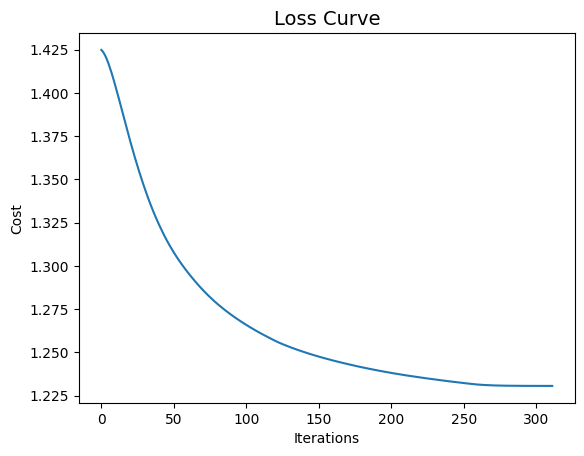

In [103]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()